# Imports

In [213]:
#basic data analysis
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for Chi-Square
import scipy.stats as stats

#data preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#tree-based models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

# Initial Look

Now let's import and take a look at the data:

In [62]:
#import the dataset
student_health = pd.read_csv("C:/Users/barbe/OneDrive/URI DS Program/577 Data Enabled Capstone/student_health_data.csv")

In [63]:
#look at first few instances
student_health.head()

Student_ID  Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1   24      M   50.663217               122.173015   
1           2   21      F   57.926042               110.778407   
2           3   22      M   59.294219               109.375673   
3           4   24      M   76.826232               125.142227   
4           5   20      M   68.342769               107.515592   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                 84.419860                3.137350                  9.028669   
1                 75.696145                3.699078                  5.819697   
2                 83.803814                6.785156                  5.892360   
3                 78.091587                6.408509                  6.884001   
4                 80.674937                7.264719                  4.483450   

  Physical_Activity Sleep_Quality      Mood  Study_Hours  Project_Hours  \
0              High      Moderate     Happy    34.520973      16.800956   
1          Moderate          Good  Stressed    16.763846      15.791154   
2               Low      Moderate     Happy    44.203798      25.678437   
3              High          Poor     Happy    21.776645      20.808391   
4          Moderate          Poor     Happy     8.964999      15.194045   

  Health_Risk_Level  
0          Moderate  
1          Moderate  
2          Moderate  
3              High  
4          Moderate

From looking at the first few instances, I can see that some variables are continuous and some are categorical. It also looks like Student_ID could be removed.

In [64]:
#check for missing values
print(student_health.isna().sum())

#check for duplicates
print(student_health.duplicated().sum())

Student_ID                  0
Age                         0
Gender                      0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Stress_Level_Biosensor      0
Stress_Level_Self_Report    0
Physical_Activity           0
Sleep_Quality               0
Mood                        0
Study_Hours                 0
Project_Hours               0
Health_Risk_Level           0
dtype: int64
0


No missing values and, as expected, no duplicates. Let's go ahead and remove Student_ID

In [65]:
student_health = student_health.drop(columns=["Student_ID"])

In [66]:
student_health.head()

Age Gender  Heart_Rate  Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
0   24      M   50.663217               122.173015                 84.419860   
1   21      F   57.926042               110.778407                 75.696145   
2   22      M   59.294219               109.375673                 83.803814   
3   24      M   76.826232               125.142227                 78.091587   
4   20      M   68.342769               107.515592                 80.674937   

   Stress_Level_Biosensor  Stress_Level_Self_Report Physical_Activity  \
0                3.137350                  9.028669              High   
1                3.699078                  5.819697          Moderate   
2                6.785156                  5.892360               Low   
3                6.408509                  6.884001              High   
4                7.264719                  4.483450          Moderate   

  Sleep_Quality      Mood  Study_Hours  Project_Hours Health_Risk_Level  
0      Moderate     Happy    34.520973      16.800956          Moderate  
1          Good  Stressed    16.763846      15.791154          Moderate  
2      Moderate     Happy    44.203798      25.678437          Moderate  
3          Poor     Happy    21.776645      20.808391              High  
4          Poor     Happy     8.964999      15.194045          Moderate

In [67]:
#look at shape/dimension of dataset
print(student_health.shape)
#look at data types for each column
print(student_health.dtypes)

(1000, 13)
Age                           int64
Gender                       object
Heart_Rate                  float64
Blood_Pressure_Systolic     float64
Blood_Pressure_Diastolic    float64
Stress_Level_Biosensor      float64
Stress_Level_Self_Report    float64
Physical_Activity            object
Sleep_Quality                object
Mood                         object
Study_Hours                 float64
Project_Hours               float64
Health_Risk_Level            object
dtype: object


The dataset consists of numerical variables (integer and float) and object variables. Looking through, these object variables are really just categorical variables. So let's change the datatype from object to categorical.

In [68]:
#convert object variables to categorical variables
for col in student_health.select_dtypes(include = ['object']).columns:
    student_health[col] = student_health[col].astype('category')

#check data types
print(student_health.dtypes)

Age                            int64
Gender                      category
Heart_Rate                   float64
Blood_Pressure_Systolic      float64
Blood_Pressure_Diastolic     float64
Stress_Level_Biosensor       float64
Stress_Level_Self_Report     float64
Physical_Activity           category
Sleep_Quality               category
Mood                        category
Study_Hours                  float64
Project_Hours                float64
Health_Risk_Level           category
dtype: object


Now all objects are set as category. This will help with analyzing the data before modeling.

# Outlier Detection 

The next step is outlier detection. This mainly applies to numerical variables.

In [70]:
#basic stats for numerical columns
student_health.describe()

Age   Heart_Rate  Blood_Pressure_Systolic  \
count  1000.0000  1000.000000              1000.000000   
mean     20.9600    70.101863               119.835380   
std       2.0036     9.544663                14.604307   
min      18.0000    50.000000                90.000000   
25%      19.0000    63.347970               109.386868   
50%      21.0000    70.330916               120.051654   
75%      23.0000    76.425149               130.397799   
max      24.0000    99.650104               165.929204   

       Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
count               1000.000000             1000.000000   
mean                  79.854756                5.483909   
std                    9.641699                2.596108   
min                   60.000000                1.008491   
25%                   73.115420                3.270567   
50%                   79.651738                5.368891   
75%                   86.535640                7.674233   
max                  107.659796                9.994153   

       Stress_Level_Self_Report  Study_Hours  Project_Hours  
count               1000.000000  1000.000000    1000.000000  
mean                   5.361601    30.227037      14.887368  
std                    2.550382    10.341060       4.888624  
min                    1.002186     5.000000       0.000000  
25%                    3.172409    23.262704      11.573503  
50%                    5.234889    30.432767      14.765873  
75%                    7.471178    37.245193      18.159167  
max                    9.964115    60.000000      32.720325

Above we have descriptive stats. We can see that the variables are on different scales - something to address when preparing for modeling. It also looks like there may be some outliers. In specific, there's a pretty big jump from 75% to max in Heart_Rate, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Study_Hours, and Project_Hours. Futher analysis will be needed.

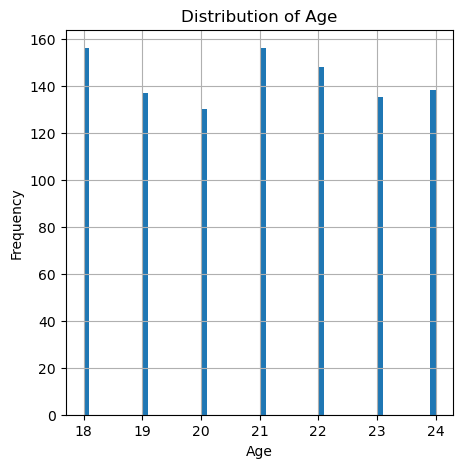

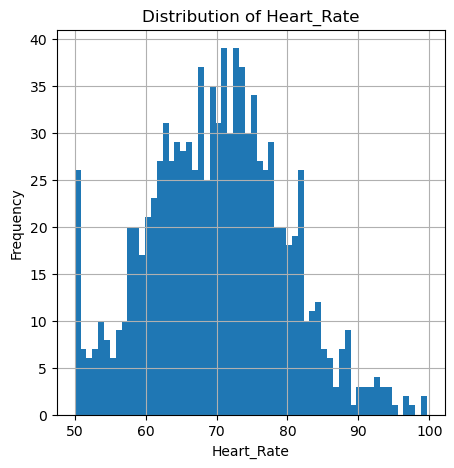

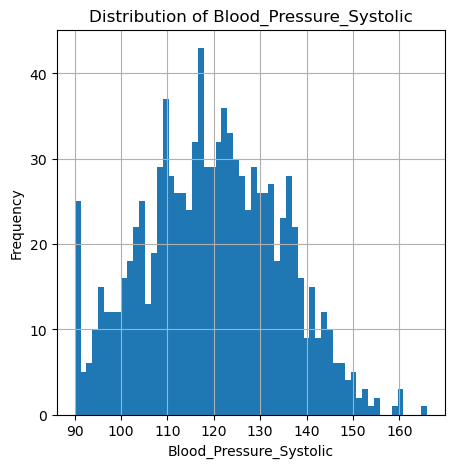

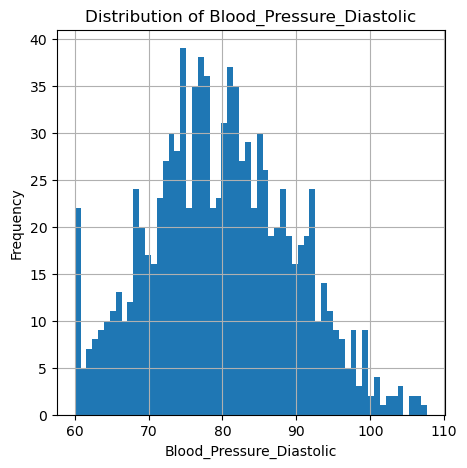

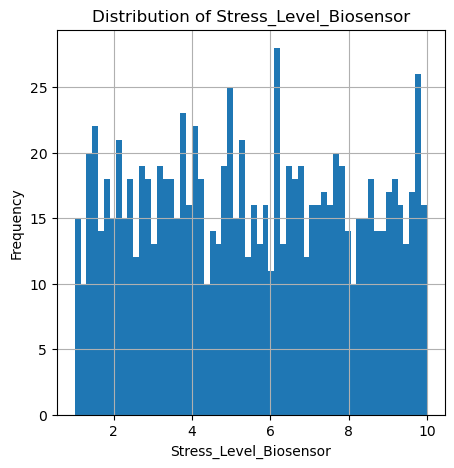

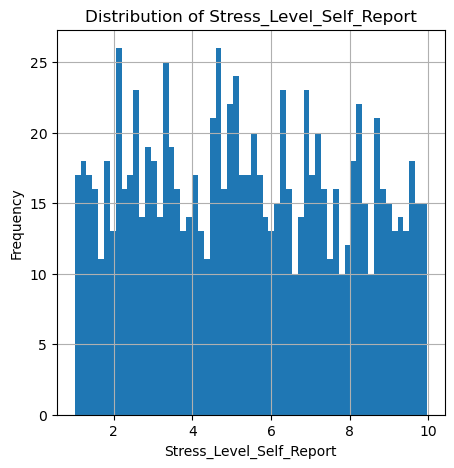

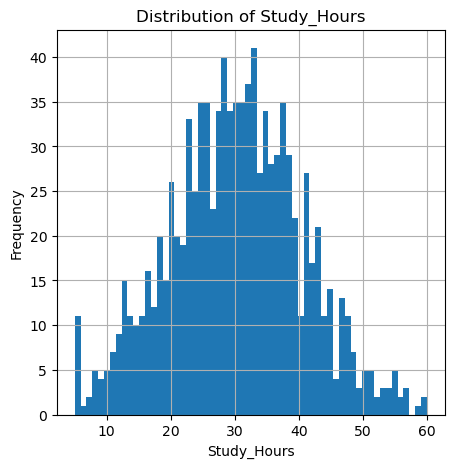

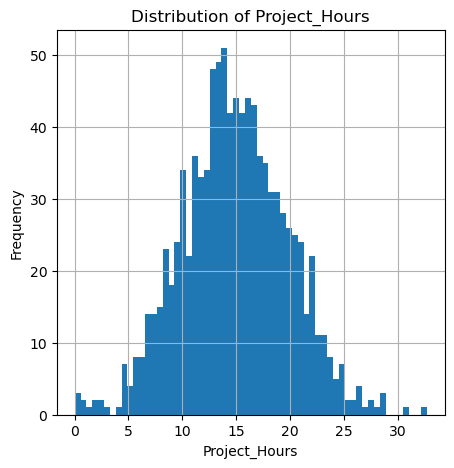

In [71]:
#list of numerical variables
numerical_var = ['Age', 'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
                 'Stress_Level_Biosensor', 'Stress_Level_Self_Report', 'Study_Hours', 'Project_Hours']

#histogram
#iterate over each numerical variable
for var in numerical_var:
    #plot a histogram for current variable
    student_health[var].hist(bins=60, figsize=(5, 5))
    #set title of the plot
    plt.title(f'Distribution of {var}')
    #label x-axis with variable name
    plt.xlabel(var)
    #label y-axis
    plt.ylabel('Frequency')
    #display plots
    plt.show()

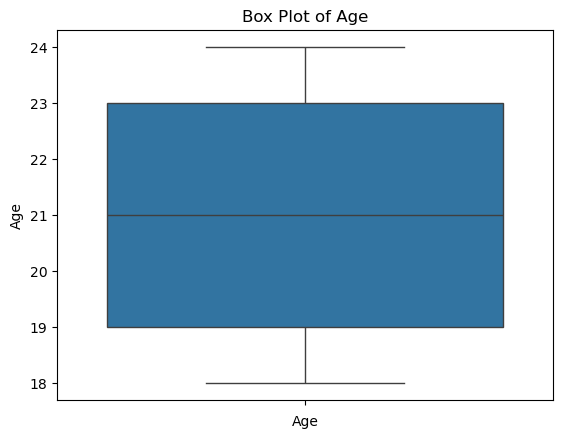

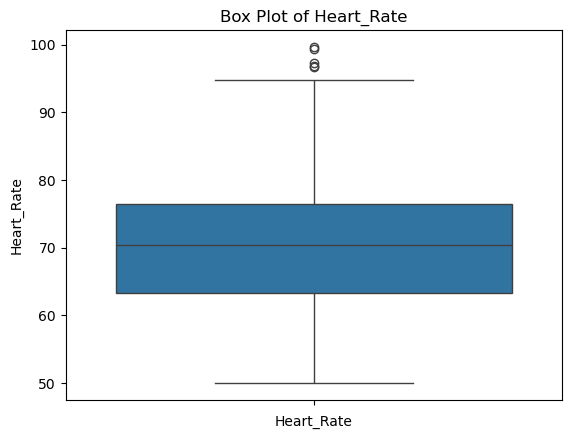

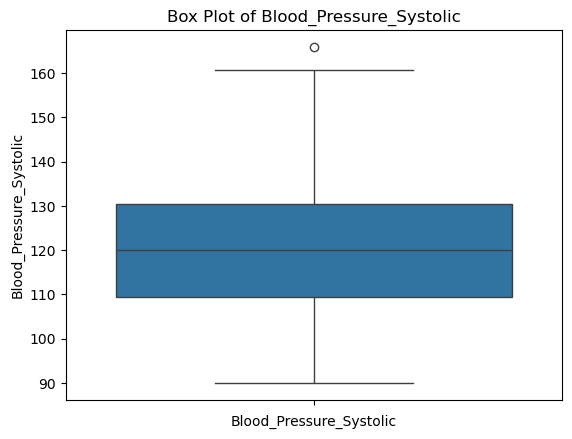

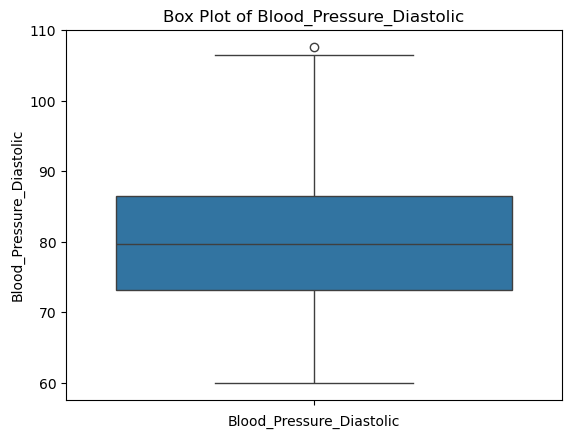

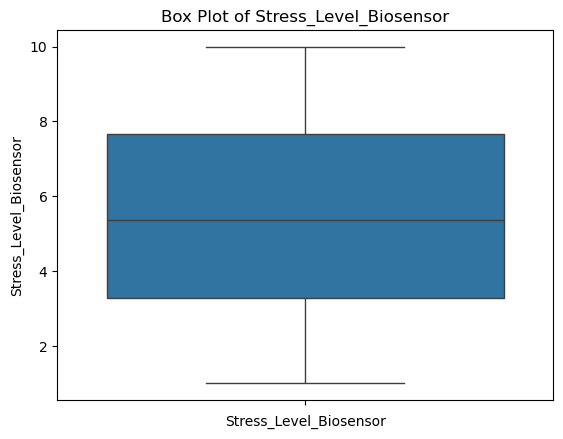

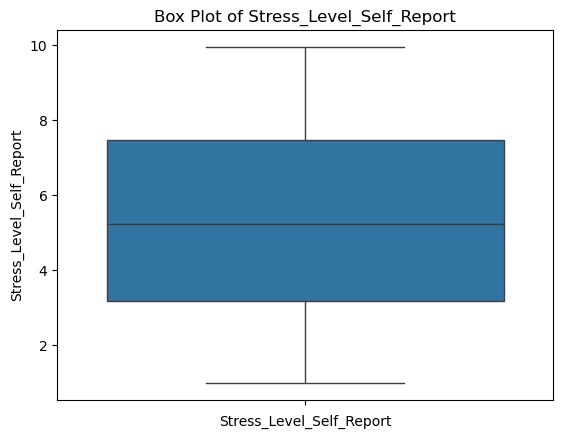

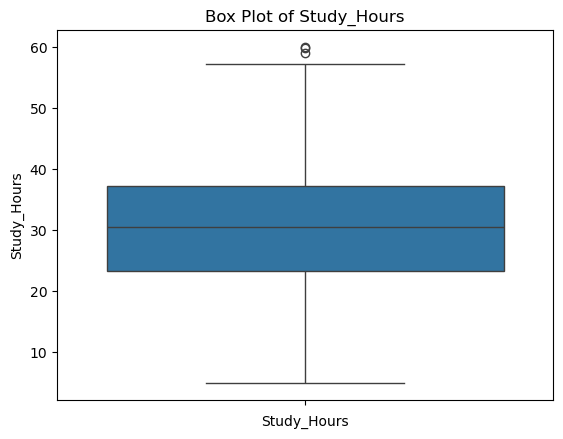

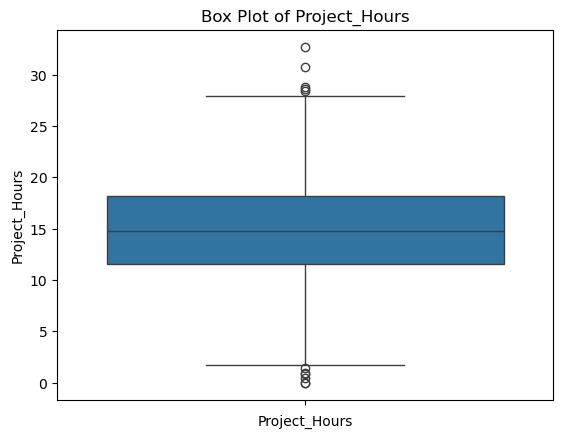

In [72]:
#boxplot
#iterate through each numerical variable
for var in numerical_var:
    #create boxplot for current variable
    sns.boxplot(data=student_health[var])
    #add title with variable name
    plt.title(f'Box Plot of {var}')
    #label x-axis with variable name
    plt.xlabel(var)
    #show boxplot
    plt.show()

The histograms and boxplots verify outliers for Heart_Rate, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Study_Hours, and Project_Hours. Let's look at the instances for these outliers.

In [73]:
#define function to identify outliers via IQR
def identify_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

#create dataframe to store outliers
outliers_df = pd.DataFrame()

#apply function to numerical variables
#iterate over variables
for var in numerical_var:
    outliers = identify_outliers(student_health, var)
    #concatenate outliers to outlier dataframe
    outliers_df = pd.concat([outliers_df, outliers])

#drop duplicate rows since some rows may be outliers in multiple columns
outliers_df = outliers_df.drop_duplicates()

#display the outliers
outliers_df

Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
198   19      M   99.650104               152.812332   
275   21      M   99.377528                98.811964   
769   24      F   96.631824               142.695139   
941   22      M   96.875344               111.297845   
979   24      F   97.308672               135.537379   
899   18      F   50.000000               165.929204   
439   19      F   66.932196               135.787934   
63    18      M   74.805621               113.068560   
443   24      F   55.928560                90.000000   
837   24      M   70.058106               129.669424   
48    18      F   83.238748               116.201176   
104   23      M   57.701306               113.281283   
179   21      M   62.014547               109.356416   
203   23      M   75.642774               131.732739   
209   23      F   78.731585               120.979023   
288   24      F   79.629655               150.268619   
291   21      M   70.674985               109.148058   
498   19      M   72.832994               119.095665   
805   23      M   69.946026               113.685917   
931   19      M   63.506687               109.426973   
932   19      M   70.831225                94.051533   

     Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
198                 81.798311                7.665972   
275                 74.927286                6.611548   
769                 63.073184                3.940650   
941                 69.414963                1.630618   
979                 78.658548                8.664233   
899                 77.116078                3.314371   
439                107.659796                9.342168   
63                  73.850496                9.185936   
443                 64.111815                3.508249   
837                 82.116004                2.518745   
48                  73.491673                7.641350   
104                 88.247490                2.853820   
179                 84.616663                2.671993   
203                 91.438367                6.527676   
209                 77.112047                8.537253   
288                 83.443842                1.363005   
291                 83.409527                2.331625   
498                 60.000000                4.122631   
805                 87.172836                7.409982   
931                 66.742062                4.404840   
932                 73.409932                1.795573   

     Stress_Level_Self_Report Physical_Activity Sleep_Quality      Mood  \
198                  4.733622          Moderate      Moderate   Neutral   
275                  3.888419          Moderate      Moderate   Neutral   
769                  3.479020          Moderate      Moderate     Happy   
941                  6.891591          Moderate      Moderate  Stressed   
979                  1.260971              High          Good     Happy   
899                  6.006128          Moderate      Moderate     Happy   
439                  1.262536          Moderate      Moderate   Neutral   
63                   5.587814          Moderate      Moderate     Happy   
443                  8.802469          Moderate          Poor  Stressed   
837                  8.253731               Low          Poor     Happy   
48                   7.408648              High          Poor     Happy   
104                  7.817221               Low          Good   Neutral   
179                  9.642397          Moderate          Good     Happy   
203                  6.485757          Moderate          Good   Neutral   
209                  2.924211          Moderate      Moderate     Happy   
288                  2.139903          Moderate      Moderate   Neutral   
291                  4.386806               Low          Good  Stressed   
498                  4.933304          Moderate          Good     Happy   
805                  5.803529          Moderate          Poor   Neutral   
931              

In [74]:
#look at shape/dimension of dataset
outliers_df.shape

(21, 13)

Here is what I see looking at the outliers:
- Heart_Rate has 5 outliers, each with high values. This also represents the first 5 instances in the outliers_df dataframe.
- Blood_Pressure_Systolic has 1 outlier, which is also the max value. This is the 6th instance.
- Blood_Pressure_Diastolic also has 1 outlier, which is also the max value. This is the 7th instance.
- Stress levels don't seem to hold any outliers.
- Study_Hours have 3 outliers, each with high values. This covers 8th - 10th instances
- Project_Hours have 11 outliers, with both high and low values. Some of these values don't quite make sense, indicating that maybe there was a data entry problem.

Aside from that, some of the features have high or low values shown in the table that we can note, but are within the IQR.

Only 21 instance were considered to have outliers. Realistically, we can remove these and still have plenty of data to work with since the original dataset contains 1000 instances. With that in mind, let's goahead and remove the instances with outliers.

In [75]:
#get outlier indices
outlier_indices = outliers_df.index

#drop rows in dataset with outlier indices
cleaned_df = student_health.drop(outlier_indices)

#look at dimension of dataset
print(cleaned_df.shape)

(979, 13)


In [76]:
#look at basic stats
cleaned_df.describe()

Age  Heart_Rate  Blood_Pressure_Systolic  \
count  979.000000  979.000000               979.000000   
mean    20.954035   69.979106               119.788093   
std      1.997169    9.367907                14.482425   
min     18.000000   50.000000                90.000000   
25%     19.000000   63.307344               109.383136   
50%     21.000000   70.304789               120.061395   
75%     23.000000   76.343322               130.365350   
max     24.000000   94.722795               160.739199   

       Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
count                979.000000              979.000000   
mean                  79.890649                5.493225   
std                    9.615105                2.593141   
min                   60.000000                1.008491   
25%                   73.103106                3.294550   
50%                   79.726681                5.401436   
75%                   86.548586                7.674901   
max                  106.450368                9.994153   

       Stress_Level_Self_Report  Study_Hours  Project_Hours  
count                979.000000   979.000000     979.000000  
mean                   5.356630    30.077246      14.885170  
std                    2.552939    10.265443       4.660111  
min                    1.002186     5.000000       1.729188  
25%                    3.152128    23.172107      11.646913  
50%                    5.232666    30.314270      14.768098  
75%                    7.474922    37.189126      18.106878  
max                    9.964115    57.136198      27.885272

Looks like we successfully removed all outliers!

# Correlation

### Numerical

We'll begin by looking at correlations between numerical variables.

In [77]:
#calculate Pearson Correlation Matrix
pearson_corr = cleaned_df[numerical_var].corr(method='pearson')
pearson_corr

Age  Heart_Rate  Blood_Pressure_Systolic  \
Age                       1.000000    0.014115                -0.008258   
Heart_Rate                0.014115    1.000000                 0.002642   
Blood_Pressure_Systolic  -0.008258    0.002642                 1.000000   
Blood_Pressure_Diastolic  0.008855   -0.021330                 0.015759   
Stress_Level_Biosensor    0.043984    0.039858                -0.033959   
Stress_Level_Self_Report  0.016734   -0.017568                -0.011818   
Study_Hours              -0.078618    0.041596                -0.004928   
Project_Hours            -0.000572   -0.000839                -0.048204   

                          Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
Age                                       0.008855                0.043984   
Heart_Rate                               -0.021330                0.039858   
Blood_Pressure_Systolic                   0.015759               -0.033959   
Blood_Pressure_Diastolic                  1.000000               -0.011212   
Stress_Level_Biosensor                   -0.011212                1.000000   
Stress_Level_Self_Report                 -0.008532               -0.016057   
Study_Hours                               0.001248               -0.028816   
Project_Hours                            -0.012685                0.001118   

                          Stress_Level_Self_Report  Study_Hours  Project_Hours  
Age                                       0.016734    -0.078618      -0.000572  
Heart_Rate                               -0.017568     0.041596      -0.000839  
Blood_Pressure_Systolic                  -0.011818    -0.004928      -0.048204  
Blood_Pressure_Diastolic                 -0.008532     0.001248      -0.012685  
Stress_Level_Biosensor                   -0.016057    -0.028816       0.001118  
Stress_Level_Self_Report                  1.000000    -0.010993       0.016558  
Study_Hours                              -0.010993     1.000000      -0.036473  
Project_Hours                             0.016558    -0.036473       1.000000

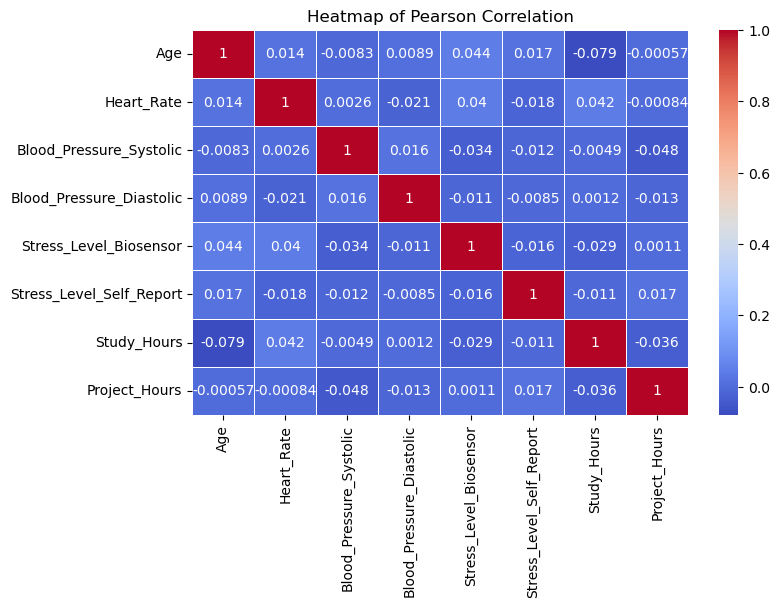

In [78]:
#heatmap of Pearson correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Pearson Correlation')
plt.show()

Looks like no numerical features are correlated. Let's verify this

In [79]:
#calculate Spearman's Rank Correlation Matric
spearman_corr = cleaned_df[numerical_var].corr(method='spearman')
spearman_corr

Age  Heart_Rate  Blood_Pressure_Systolic  \
Age                       1.000000    0.010718                -0.004715   
Heart_Rate                0.010718    1.000000                 0.010531   
Blood_Pressure_Systolic  -0.004715    0.010531                 1.000000   
Blood_Pressure_Diastolic  0.001238   -0.008705                 0.013235   
Stress_Level_Biosensor    0.044051    0.052829                -0.034453   
Stress_Level_Self_Report  0.015880   -0.022482                -0.010599   
Study_Hours              -0.079549    0.036688                -0.006829   
Project_Hours             0.004606    0.000002                -0.037278   

                          Blood_Pressure_Diastolic  Stress_Level_Biosensor  \
Age                                       0.001238                0.044051   
Heart_Rate                               -0.008705                0.052829   
Blood_Pressure_Systolic                   0.013235               -0.034453   
Blood_Pressure_Diastolic                  1.000000               -0.017856   
Stress_Level_Biosensor                   -0.017856                1.000000   
Stress_Level_Self_Report                 -0.000378               -0.016621   
Study_Hours                               0.001954               -0.031668   
Project_Hours                            -0.022251               -0.001035   

                          Stress_Level_Self_Report  Study_Hours  Project_Hours  
Age                                       0.015880    -0.079549       0.004606  
Heart_Rate                               -0.022482     0.036688       0.000002  
Blood_Pressure_Systolic                  -0.010599    -0.006829      -0.037278  
Blood_Pressure_Diastolic                 -0.000378     0.001954      -0.022251  
Stress_Level_Biosensor                   -0.016621    -0.031668      -0.001035  
Stress_Level_Self_Report                  1.000000    -0.010669       0.013275  
Study_Hours                              -0.010669     1.000000      -0.039752  
Project_Hours                             0.013275    -0.039752       1.000000

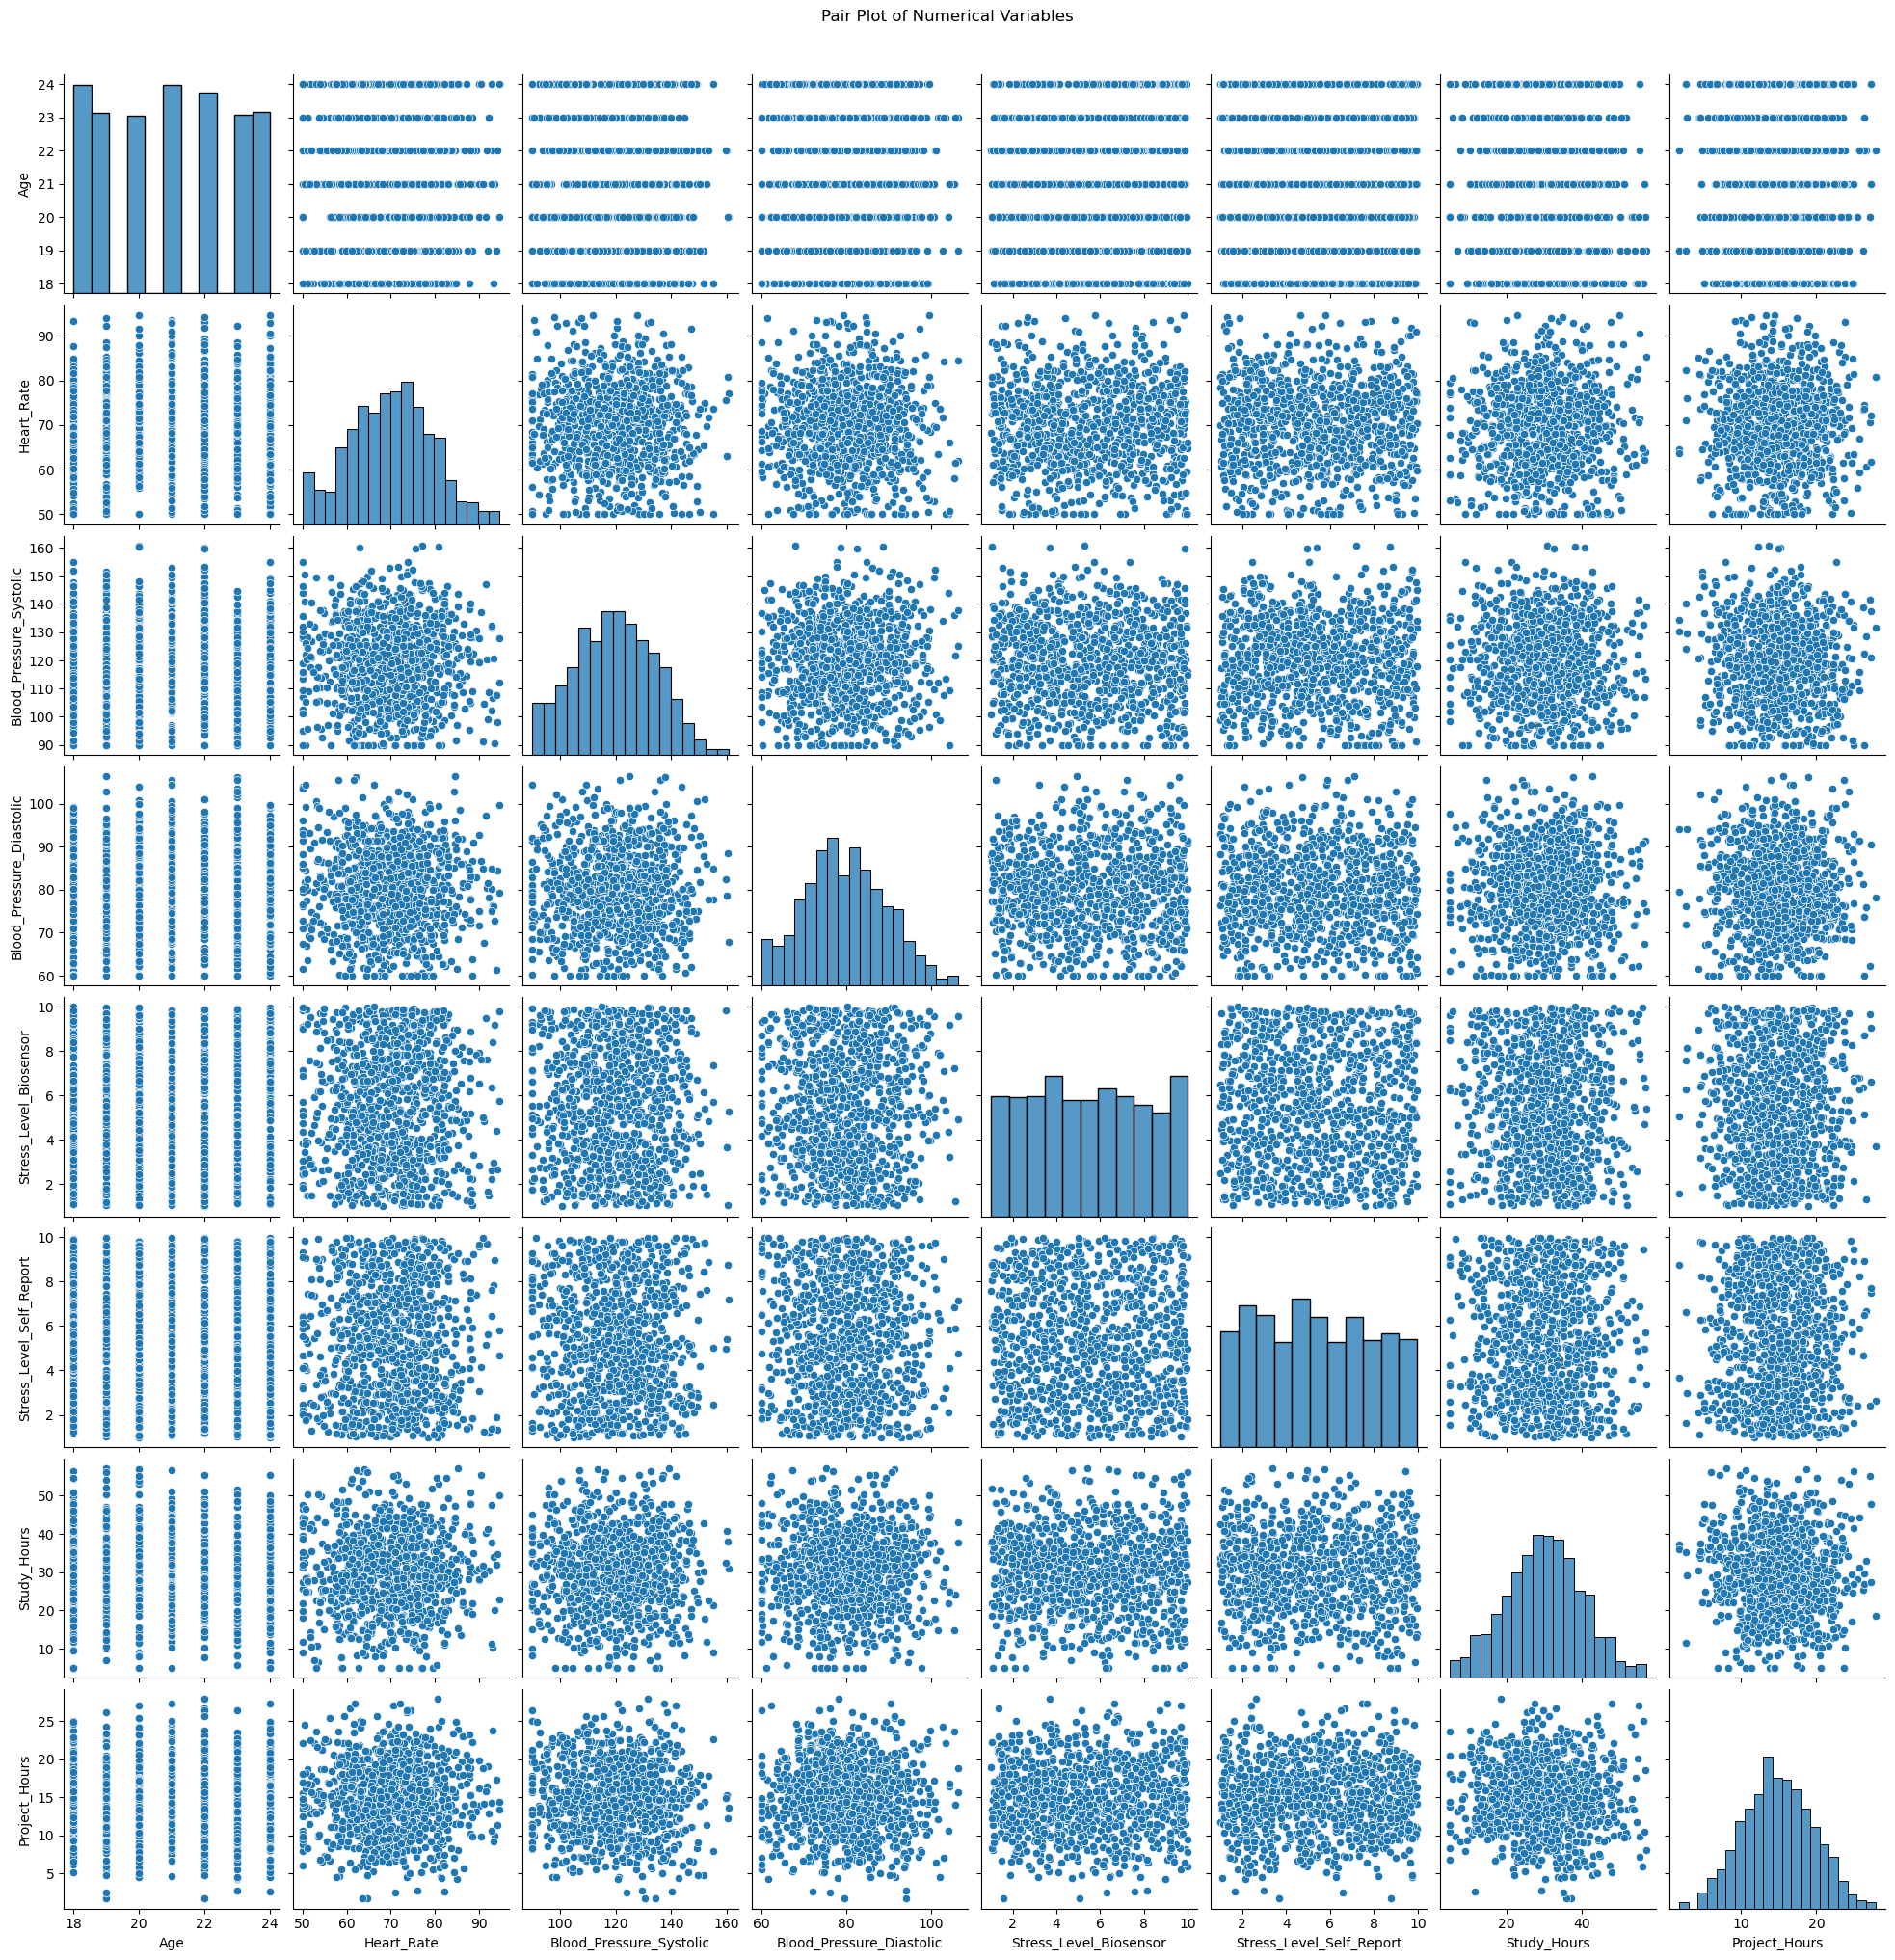

In [80]:
#pair plot
sns.pairplot(cleaned_df[numerical_var])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

Pair plots is a lot to look at. But by going over each of the scatterplots, I can verify visually that none of the numerical features are correlated. 

The last thing to check out now is to see how the numerical features correlate to the target variable.

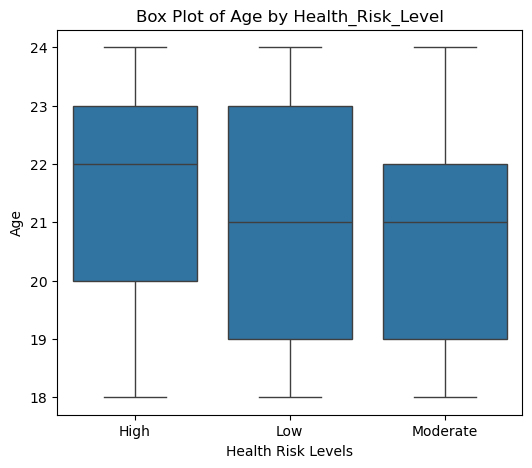

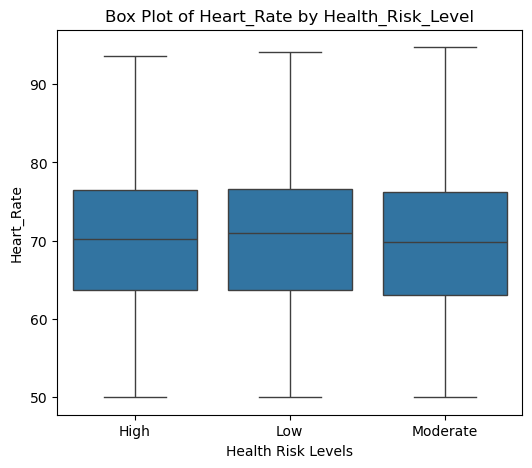

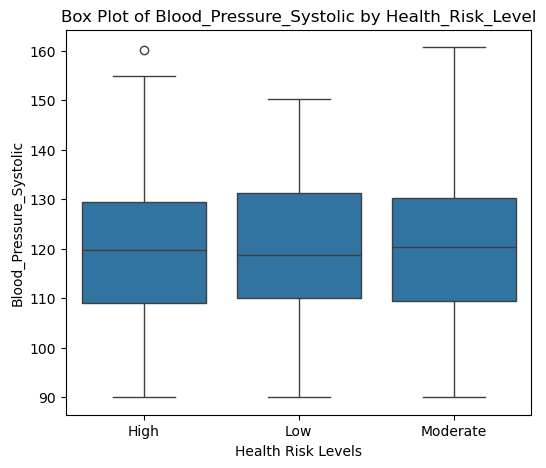

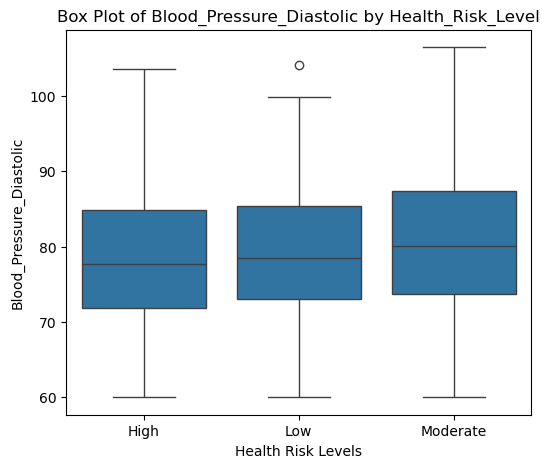

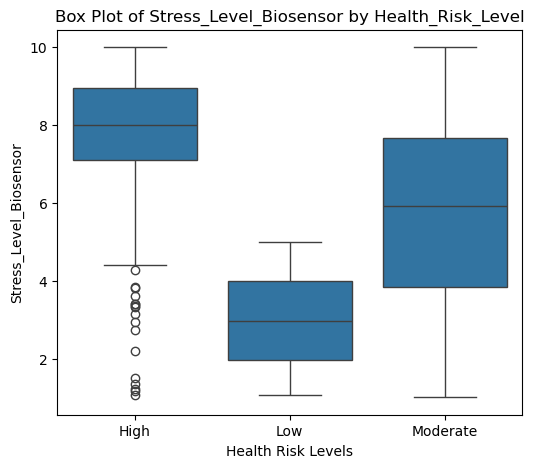

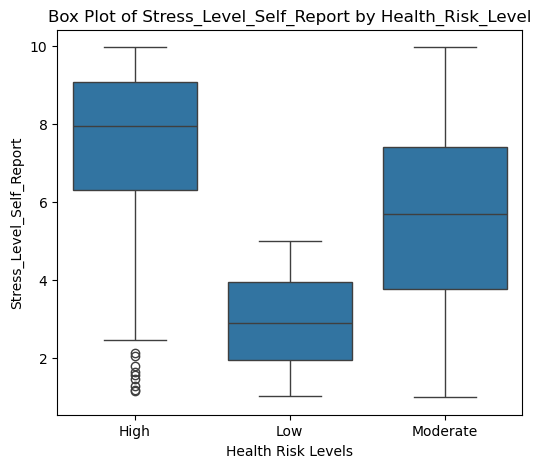

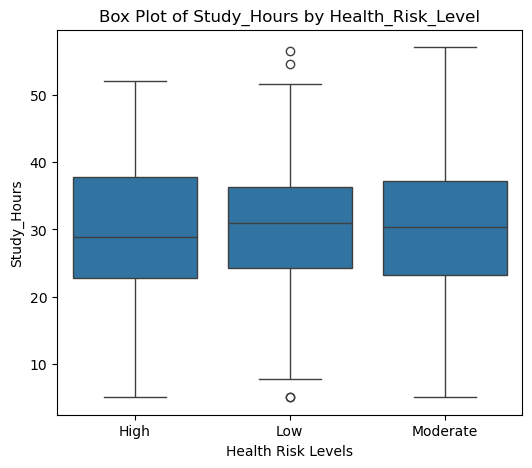

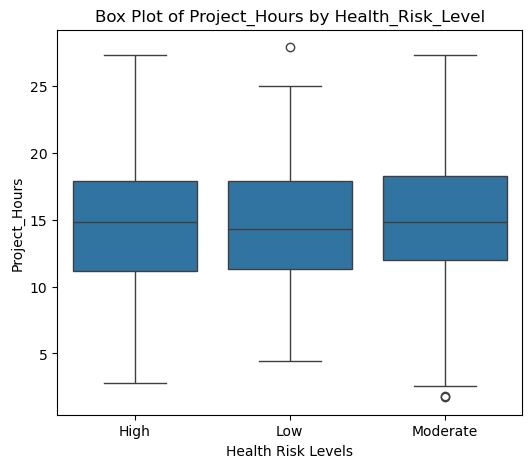

In [81]:
# Create Box Plots
for var in numerical_var:
    plt.figure(figsize=(6, 5))
    #create boxplot for each numerical variable grouped by the target variable
    sns.boxplot(x=cleaned_df['Health_Risk_Level'], y=cleaned_df[var])
    plt.title(f'Box Plot of {var} by Health_Risk_Level')
    plt.xlabel('Health Risk Levels')
    plt.ylabel(var)
    plt.show()

Here is what I've noted:
- The median Age is higher for "High" Health_Risk_Level than for the other levels. This indicates a potential correlation between Age and Health_Risk_Level.
    - Median Age is similar for Low and Medium levels.
- Median Heat_Rate is similar for all risk levels.
- Median Blood_Pressure_Systolic are similar, but there appears to be an outlier.
- Similar can be said about Blodd_Pressure_Diastolic.
- Median Stress_Level_Biosensor varies greatly between risk categories. Furthermore, there appears to be quite a bit of outliers in the high risk category.
- Similar can be said about Stress_Level_Selft_Report.
- Median Study_Hours are comparable, with some outliers in the low risk category.
- Similar can be said about Project_Hours, though there are outliers in the low and medium risk levels.

Overall, it looks like there are some instance of potential correlation with some of the features and the target variable, and there are instances of no potential correlation.

### Categorical

Now, let's look at the categorical variable in more detail.

In [82]:
#look at value counts for non-numerical columns

#create vector for non-numeric columns
obj_var = ['Gender', 'Physical_Activity', 'Sleep_Quality', 'Mood', 'Health_Risk_Level']

#iterate through each variable and print
for i in obj_var:
    print(cleaned_df[i].value_counts(), '\n')

Gender
M    506
F    473
Name: count, dtype: int64 

Physical_Activity
Moderate    475
Low         299
High        205
Name: count, dtype: int64 

Sleep_Quality
Good        467
Moderate    308
Poor        204
Name: count, dtype: int64 

Mood
Neutral     406
Happy       390
Stressed    183
Name: count, dtype: int64 

Health_Risk_Level
Moderate    656
Low         186
High        137
Name: count, dtype: int64 



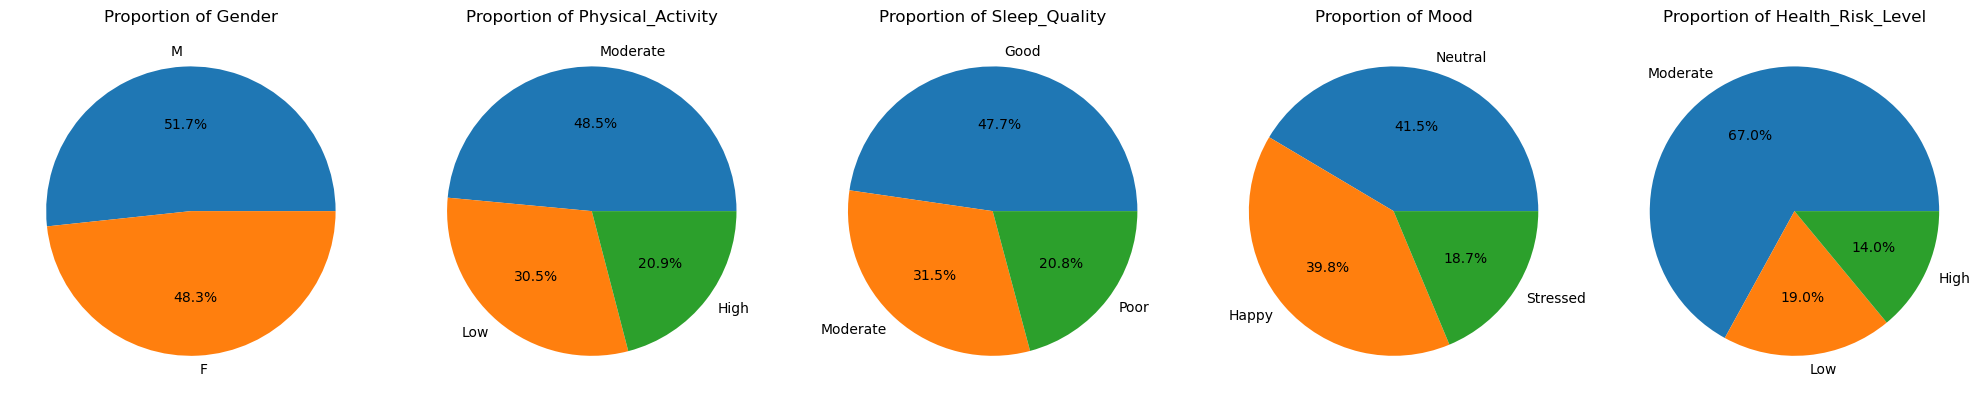

In [83]:
#pie chart to visualize category distribution

#create subplots: a grid of plots, one for each variable
fig, axes = plt.subplots(1, len(obj_var), figsize=(20, 5))

#loop through each variable in the list
for idx, var in enumerate(obj_var):
    cleaned_df[var].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[idx])
    axes[idx].set_title(f'Proportion of {var}')
    axes[idx].set_ylabel('')  #remove y-axis label for cleaner look

plt.tight_layout()
plt.show()

We can see that for all categorical features, the categories are imbalanced. Let's see how these categories relate to each other.

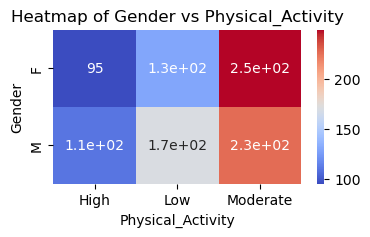

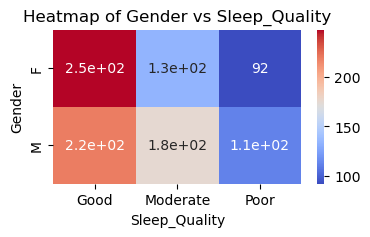

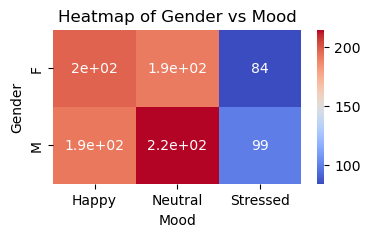

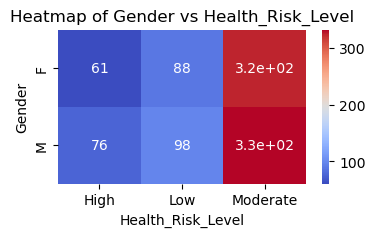

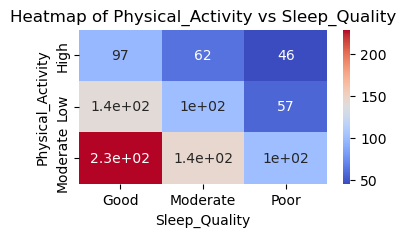

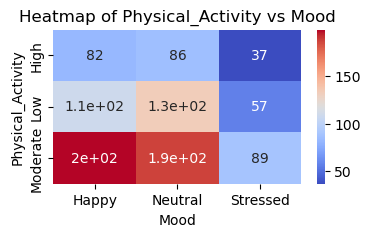

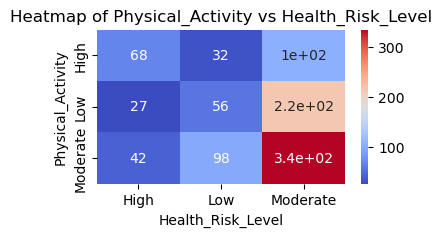

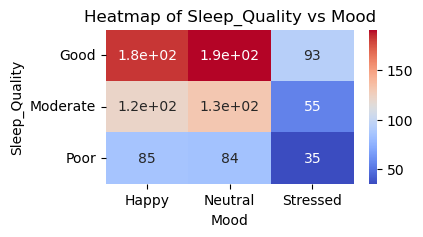

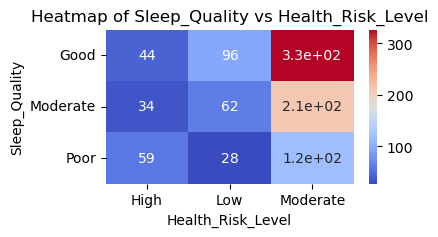

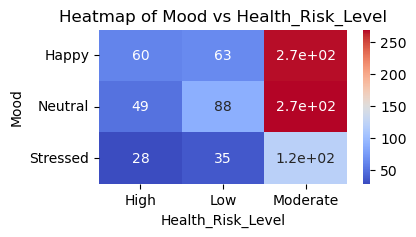

In [84]:
#Heatmap comparing each of the categorical variables to each other

#loop through each pair of variables without repeating
for i in range(len(obj_var)): #iterates over list of variables from beginning to end
    for j in range(i + 1, len(obj_var)): #ensure each pair is only visualized once
        var1 = obj_var[i]
        var2 = obj_var[j]
        
        #create a crosstab
        crosstab = pd.crosstab(cleaned_df[var1], cleaned_df[var2])
        
        #plot the heatmap
        plt.figure(figsize=(4, 2))
        sns.heatmap(crosstab, annot=True, cmap='coolwarm')
        plt.title(f'Heatmap of {var1} vs {var2}')
        plt.show()

Here is what I've noted:
- It seems like for each heatmap, we can see there is potential for some correlation.

In [85]:
#function to calculate Chi-Square p-value
def chi_square_test(x, y):
    #create contigency table from the two variables
    contingency_table = pd.crosstab(x, y)
    #perform Ch-Square Test for independence
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    #return p-value
    return p

#loop through unique pairs of variables
for i in range(len(obj_var)):
    for j in range(i + 1, len(obj_var)):
        #select the two variables for the current pair
        var1 = obj_var[i]
        var2 = obj_var[j]

        #calculate Chi-Square p-value
        p_value = chi_square_test(cleaned_df[var1], cleaned_df[var2])
        print(f'Chi-Square p-value for {var1} and {var2}: {p_value}')

Chi-Square p-value for Gender and Physical_Activity: 0.034586142078450614
Chi-Square p-value for Gender and Sleep_Quality: 0.015100291529196634
Chi-Square p-value for Gender and Mood: 0.44263321443120285
Chi-Square p-value for Gender and Health_Risk_Level: 0.5580824884585867
Chi-Square p-value for Physical_Activity and Sleep_Quality: 0.8204041135148793
Chi-Square p-value for Physical_Activity and Mood: 0.6261103118512352
Chi-Square p-value for Physical_Activity and Health_Risk_Level: 1.930445735375106e-16
Chi-Square p-value for Sleep_Quality and Mood: 0.8950487122842119
Chi-Square p-value for Sleep_Quality and Health_Risk_Level: 6.440596238339458e-10
Chi-Square p-value for Mood and Health_Risk_Level: 0.26315918913566794


Interpretation: if the p-value is < 0.05, it suggests there is a statistically significant association between the two variables. If > 0.05, it indicates that observed association is likely due to chance.

Keeping the interpretation in mind, we can see that, according to the Chi-Square test, there are associations between:
- Gender and Physical_Activity
- Gender and Slepp_Quality
- Physical_Activity and Health_Risk_Level
- Slepp_Quality and Health_Risk_Level

# Getting Ready to Model

#### Split the data

First we separate the our features and target. We'll make a feature matrix and a target vector.

In [86]:
#define feature matrix and target vector
X = cleaned_df.drop(columns = ["Health_Risk_Level"])
y = cleaned_df["Health_Risk_Level"]

In [87]:
#check sizes
print(f'cleaned_df size: {cleaned_df.shape}')
print(f'feature matrix size: {X.shape}')
print(f'target vector size: {y.shape}')

cleaned_df size: (979, 13)
feature matrix size: (979, 12)
target vector size: (979,)


In [88]:
X.head()

Age Gender  Heart_Rate  Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
0   24      M   50.663217               122.173015                 84.419860   
1   21      F   57.926042               110.778407                 75.696145   
2   22      M   59.294219               109.375673                 83.803814   
3   24      M   76.826232               125.142227                 78.091587   
4   20      M   68.342769               107.515592                 80.674937   

   Stress_Level_Biosensor  Stress_Level_Self_Report Physical_Activity  \
0                3.137350                  9.028669              High   
1                3.699078                  5.819697          Moderate   
2                6.785156                  5.892360               Low   
3                6.408509                  6.884001              High   
4                7.264719                  4.483450          Moderate   

  Sleep_Quality      Mood  Study_Hours  Project_Hours  
0      Moderate     Happy    34.520973      16.800956  
1          Good  Stressed    16.763846      15.791154  
2      Moderate     Happy    44.203798      25.678437  
3          Poor     Happy    21.776645      20.808391  
4          Poor     Happy     8.964999      15.194045

Next step is to split the data into a training set (80%), and validation set for hyperparameter tuning (10%) and a test set for a final model performance (10%)

In [89]:
#split data into a training set and a temp set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 12)

#split the temp set into a validation set and final test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp, random_state = 12)

Now to ensure that that the split occurred as desired. First we check the sizes of our feature sets

In [90]:
#check number of instances in each split
print(f"Training set size: {X_train.shape[0]}") #X_train.shape[0] gives the number of rows in the trainin set
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 783
Validation set size: 98
Test set size: 98


In [91]:
print(783/979)
print(98/979)

0.7997957099080695
0.10010214504596528


Now to ensure that each target variable has the same distribution.

In [92]:
#print class distribution as percent
print("Class distribution in Training Set:") #training set
print(y_train.value_counts(normalize=True))  #normalized (percentages)

print("\nClass distribution in Validation Set:") #validation set
print(y_val.value_counts(normalize=True))

print("\nClass distribution in Test Set:") #test set
print(y_test.value_counts(normalize=True))

Class distribution in Training Set:
Health_Risk_Level
Moderate    0.670498
Low         0.190294
High        0.139208
Name: proportion, dtype: float64

Class distribution in Validation Set:
Health_Risk_Level
Moderate    0.663265
Low         0.193878
High        0.142857
Name: proportion, dtype: float64

Class distribution in Test Set:
Health_Risk_Level
Moderate    0.673469
Low         0.183673
High        0.142857
Name: proportion, dtype: float64


It looks like the data has been split relatively evenly, retaining the distribution of categories almost perfectly.

#### Preprocess the data

Now that the data has been split, let's go ahead and preprocess it. We begin by encoding the categorical data.
- It should be noted that tree-based models don't require as much preprocessing, but to ensure consistency across different models (tree-based, KNN, SVM), it's simpler to preprocess the data once and use the preprocessed data for all models.
- LabelEncoder converts each category into a unique integer.
- pd.get_dummies is used for one-hot encoding
- Aligning ensures all datasets have the same features.

In [118]:
#encode categorical features - uses one-hot encoding
X_train_encode = pd.get_dummies(X_train)
X_val_encode = pd.get_dummies(X_val)
X_test_encode = pd.get_dummies(X_test)

#align validation and test sets with training set - ensures same columns
X_val_encode = X_val_encode.reindex(columns = X_train_encode.columns, fill_value = 0)
X_test_encode = X_test_encode.reindex(columns = X_train_encode.columns, fill_value = 0)

#initialize and fit scaler on training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encode)

#transform validation and test data
X_val_scaled = scaler.transform(X_val_encode)
X_test_scaled = scaler.transform(X_test_encode)

#manually set class order
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(["Low", "Moderate", "High"])  #custom order

#encode labels
y_train_encode = label_encoder.transform(y_train)
y_val_encode = label_encoder.transform(y_val)
y_test_encode = label_encoder.transform(y_test)

#check mapping
label_mapping = dict(enumerate(label_encoder.classes_))
print("Label Encoding Mapping:", label_mapping)

#rename matrices and vectors for ease of use - could  be done better, but didn't want to overwrite previous train, val, and test
X_train2 = X_train_scaled
X_val2 = X_val_scaled
X_test2 = X_test_scaled

y_train2 = y_train_encode
y_val2 = y_val_encode
y_test2 = y_test_encode

Label Encoding Mapping: {0: 'Low', 1: 'Moderate', 2: 'High'}


Now that we have our data preprocess, it's time to begin the modeling process.

# Tree-Based Models

## Decision Tree

### Initializing and Training the Decision Tree

Let's sart with a default decision tree.

In [176]:
#initialize decision tree
dt = DecisionTreeClassifier(random_state = 13)

#train the model
dt.fit(X_train2, y_train2)

#make predictions on validation set
y_pred = dt.predict(X_val2)

#evaluate model
v_acc = accuracy_score(y_val2, y_pred)
v_f1 = f1_score(y_val2, y_pred, average='weighted')
v_precision = precision_score(y_val2, y_pred, average='weighted')
v_recall = recall_score(y_val2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_val2, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(f'Decision Tree Validation Accuracy: {v_acc:.2f}')
print(f'Decision Tree Weighted F1-Score: {v_f1:.2f}')
print(f'Decision Tree Weighted Precision: {v_precision:.2f}')
print(f'Decision Tree Weighted Recall: {v_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

Decision Tree Validation Accuracy: 0.97
Decision Tree Weighted F1-Score: 0.97
Decision Tree Weighted Precision: 0.97
Decision Tree Weighted Recall: 0.97
Confusion Matrix:
Predicted   0   1   2
Actual               
0          19   0   0
1           0  64   1
2           0   2  12


In [219]:
#perform cross-validation
cv_scores = cross_val_score(dt, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')

Cross-Validation Accuracy: 0.99 (+/- 0.01)


Here is what our metrics tell us:
- We have a 97% overall accuracy, meaning the model performs well in correctly classifying instances.
- The F1-Score is quite high, indicating a balance between precision and recall.
- High precision indicates that when our model predicts a class, it's likely to be correct
- A high recall suggests that our model is effectively capturing most of the actual instances.
- The F1-Score, Precision, and Recall being 97% indicates that the model maintains a god balance between precision and recall across different classes.
- There were no misclassifications for Low risk levels, which means the model is confident and accurate predicting this class.
- Note that 2 High health risk levels were predicted as Moderate and 1 Moderate instance was classified as High. This may be because the model finds it harder to distinguish between Moderate and High risk levels - especially since the boundary between these two classes can be less clear compared to Low and the other two.
- If predicting High-Risk as Moderate means missing out on critical intervention actions, this could be potentially dangerous since the instance wouldn't receive the care they require. This also depends on the care received for Moderate and High.

#### Initial Visualization of the Decsion Tree

Let's take a look at the model, and take a look at feature importance.

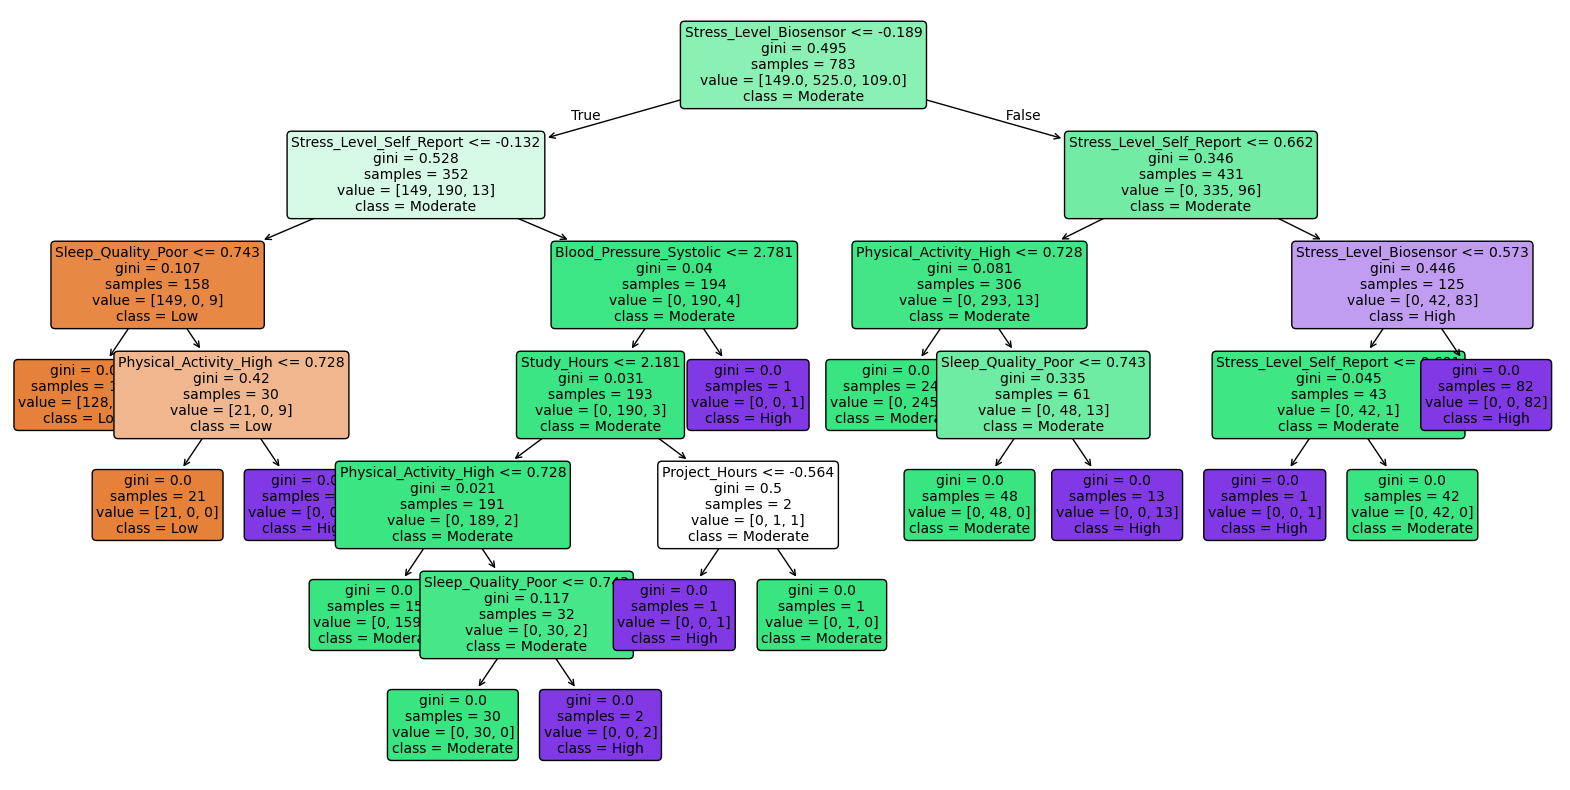

In [177]:
#set figure size
plt.figure(figsize=(20, 10))

#plot the decision tree
plot_tree(dt, 
          feature_names=X_train_encode.columns,  #make sure you pass the correct feature names
          class_names=label_encoder.classes_,    #class names from LabelEncoder
          filled=True, rounded=True, fontsize=10)
#show plot
plt.show()

Note that the tree isn't massive, nor is it too deep. Other notes include:
- Stress levels seem to be the most important feature in predicting health risk levels.
- Poor sleep quality, blood pressure, and high physical activity seems to be the next important features.
- We also see study hours and project hours play a role.

#### Initial Decision Tree Structure Format

In [178]:
print("Depth of the decision tree: ", dt.tree_.max_depth)#depth of tree
print("Number of nodes: ", dt.tree_.node_count) #number of nodes
print("Number of splits: ", dt.tree_.n_leaves) #number of splits

Depth of the decision tree:  6
Number of nodes:  29
Number of splits:  15


#### Initial Decision Tree Feature Importance

In [179]:
#get feature importanc scores
feature_importance = dt.feature_importances_

#create dataframe to visualize feature importance scores
importance_dt = pd.DataFrame({'Feature': X_train_encode.columns, 'Importance': feature_importance})

#sort by importance in descending order
importance_dt = importance_dt.sort_values(by='Importance', ascending=False)

#display top features
print(importance_dt.head(8))

                     Feature  Importance
5   Stress_Level_Self_Report    0.597734
4     Stress_Level_Biosensor    0.273982
15        Sleep_Quality_Poor    0.073772
10    Physical_Activity_High    0.044506
2    Blood_Pressure_Systolic    0.004977
7              Project_Hours    0.002581
6                Study_Hours    0.002448
0                        Age    0.000000


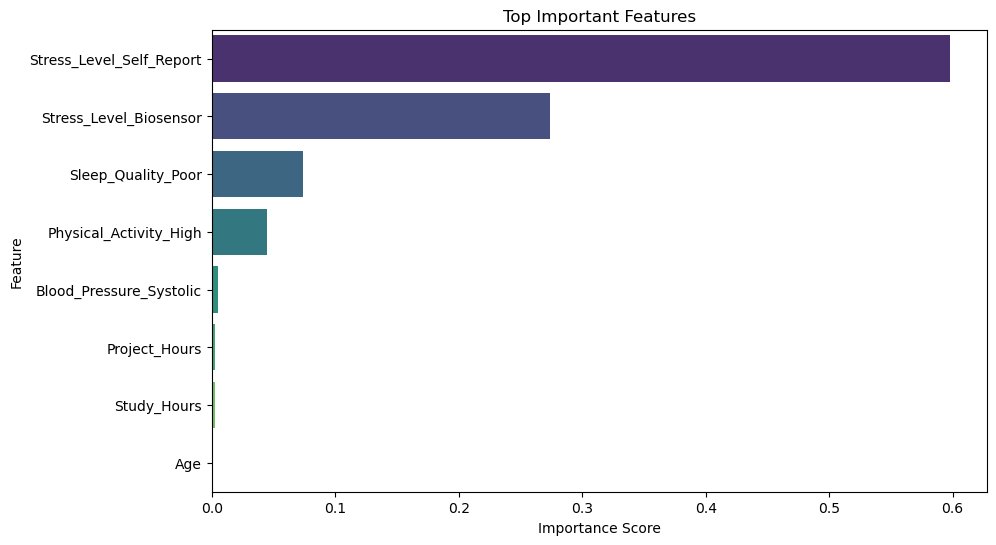

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:8], hue='Feature', palette="viridis", legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

Observations from the output:
- Stress_Level_Self_Roprt is the most important feature
- Stress_Level_Biosensor is also highly significant
- Sleep_Quality_Poor is an important factor, but not as much as stree levels.
- As we go down the list, the features becom less important. Features from Age down do not contribute to predictions at all.

Interpretations:
- Stress levels dominate predictions. This suggests interventions targeting stress reduction could significantly improve student health.
- Sleep quality matters, but noticing that Sleep_Quality_Good doesn't contribute to predictions implies that improving poor sleep quality could also prove helpful in reducing risk levels.
- Physical_Activity_High has some relevance, while Studey_Hours and Project_Hours have very little. This may indicate that mental and physical well-being are more indicative of health risk than academic load.
  - Note that academic load, along with physical activities, could play a significant role in stress levels
- Dropping features with 0 importance could simplify the model without affecting accuracy.

### Improving the Decision Tree

Now that we have out first tree, let's try to optimize it. There are two ways we can do this.
- GridSearchCV will help determine the optmial combination of hyperparameters by testing all possible combinations of values defined in a grid.
- Rerun the model after cutting irrelevant features to determine if this makes any improvements.
  - Note: cutting irrelevant features shouldn't impact model accuracy, but decreases complexity.
 
Let's start with GridSearchCV. Some notes:
- Since the initial tree had a max depth of 6, we'll try a range around that value to see if a slightly more shallow or deeper tree performs better.
- We'll tune min_samples_split and min_samples_leaf to control the number of splits and leaves
- We'll also check criterion for splitting.

#### Grid Search CV for Decision Tree

In [181]:
#define parameter grid
params = {
    'max_depth': [4, 6, 8, 10], #max depth of tree
    'min_samples_split': [2, 5, 10, 20], #values to control the number of splits
    'min_samples_leaf': [1, 5, 10, 20], #values to control minimum samples oer leaf node
    'criterion': ['gini', 'entropy'] #different splitting criteria
}

In [182]:
#initialize decision tree
dt = DecisionTreeClassifier(random_state = 13)

#initialize grid search
grid_search = GridSearchCV(estimator = dt, param_grid = params, cv = 10, scoring = 'f1_weighted')

In [184]:
#fit grid search to training data and record time
grid_search.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=13),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1_weighted')

In [185]:
#get best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Training and Evaluating Tuned Decision Tree

In [186]:
#initialize model with best parameters
dt_tune = DecisionTreeClassifier(
    random_state=13,
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split']
)

#train the model
dt_tune.fit(X_train2, y_train2)

#make predictions on validation set
y_pred = dt_tune.predict(X_val2)

#evaluate model
v_acc = accuracy_score(y_val2, y_pred)
v_f1 = f1_score(y_val2, y_pred, average='weighted')
v_precision = precision_score(y_val2, y_pred, average='weighted')
v_recall = recall_score(y_val2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_val2, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(f'Decision Tree (Tuned) Validation Accuracy: {v_acc:.2f}')
print(f'Decision Tree (Tuned) Weighted F1-Score: {v_f1:.2f}')
print(f'Decision Tree (Tuned) Weighted Precision: {v_precision:.2f}')
print(f'Decision Tree (Tuned) Weighted Recall: {v_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)


Decision Tree (Tuned) Validation Accuracy: 0.97
Decision Tree (Tuned) Weighted F1-Score: 0.97
Decision Tree (Tuned) Weighted Precision: 0.97
Decision Tree (Tuned) Weighted Recall: 0.97
Confusion Matrix:
Predicted   0   1   2
Actual               
0          19   0   0
1           0  64   1
2           0   2  12


In [217]:
#perform cross-validation
cv_scores = cross_val_score(dt_tune, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')

Cross-Validation Accuracy: 1.00 (+/- 0.01)


No clear differences in evaluation metrics. Even the misclassifications are the same. Let's see how this impacts feature selection.

#### Visualization of Tuned Decision Tree

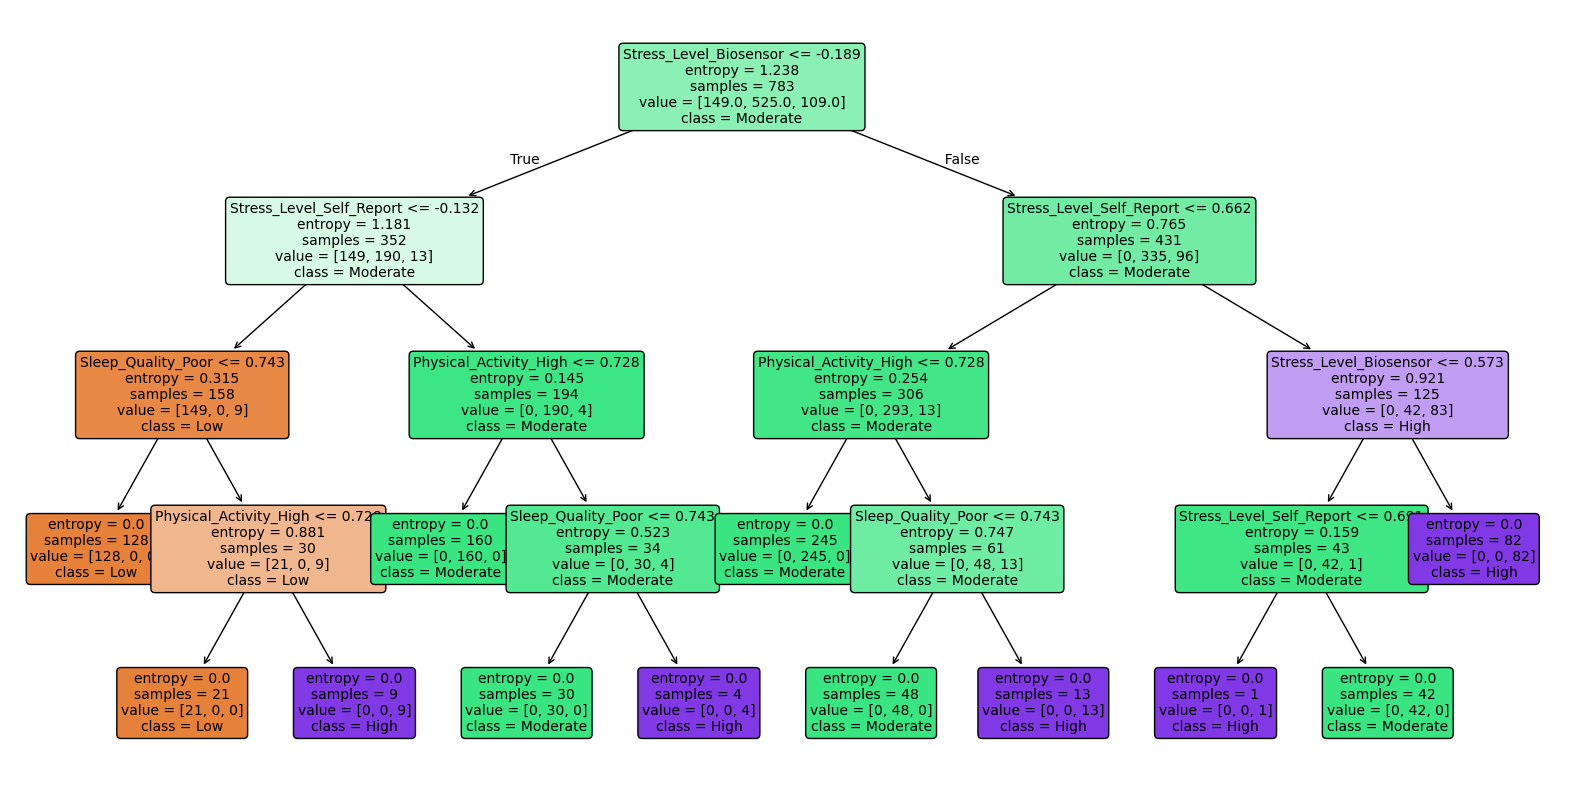

In [187]:
#set figure size
plt.figure(figsize=(20, 10))

#plot the decision tree
plot_tree(dt_tune, 
          feature_names=X_train_encode.columns,  #make sure you pass the correct feature names
          class_names=label_encoder.classes_,    #class names from LabelEncoder
          filled=True, rounded=True, fontsize=10)
#show plot
plt.show()

This tree looks less complex than what we got with our default decision tree. We can see that stress, poor sleep quality, and high physical activity are still the most impoartant features.

#### Tuned Decision Tree Structure Format

In [188]:
print("Depth of the decision tree: ", dt_tune.tree_.max_depth)#depth of tree
print("Number of nodes: ", dt_tune.tree_.node_count) #number of nodes
print("Number of splits: ", dt_tune.tree_.n_leaves) #number of splits

Depth of the decision tree:  4
Number of nodes:  23
Number of splits:  12


#### Tuned Decision Tree Feature Importance

In [192]:
#get feature importanc scores
feature_importance = dt_tune.feature_importances_

#create dataframe to visualize feature importance scores
importance_dt_tune = pd.DataFrame({'Feature': X_train_encode.columns, 'Importance': feature_importance})

#sort by importance in descending order
importance_dt_tune = importance_dt_tune.sort_values(by='Importance', ascending=False)

#display top features
importance_dt_tune.head(8)

Feature  Importance
5   Stress_Level_Self_Report    0.496835
4     Stress_Level_Biosensor    0.342758
15        Sleep_Quality_Poor    0.089460
10    Physical_Activity_High    0.070946
0                        Age    0.000000
11     Physical_Activity_Low    0.000000
17              Mood_Neutral    0.000000
16                Mood_Happy    0.000000

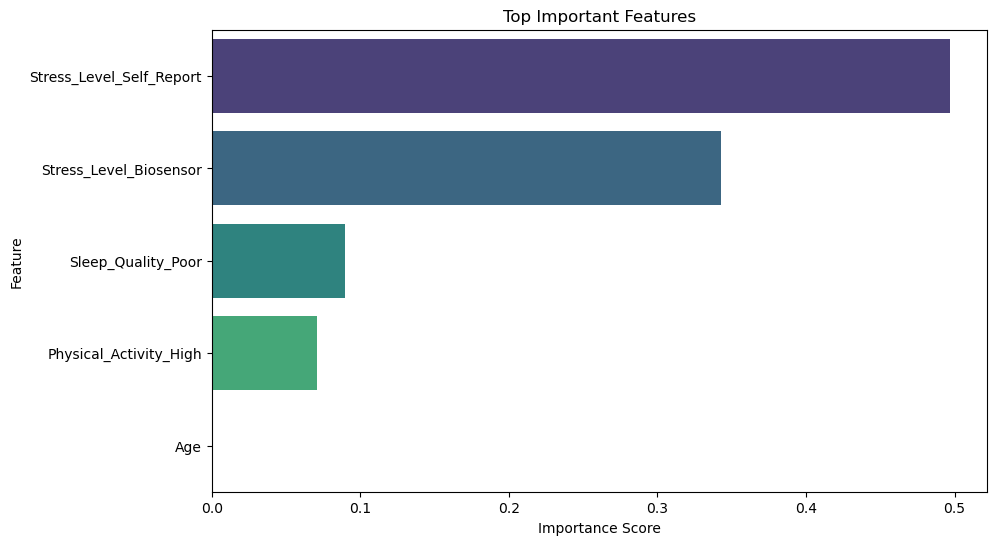

In [193]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_tune[:5], hue='Feature', palette="viridis", legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

It's mostly the same. We see that Stress, poor sleep, and high physical activities still play an integral role. But Blood_Pressure_Systolic, Study_Hours and Project_Hours play no role.
- Stress reduction is still instrumental in decreasing health risk levels.
- Changing poor sleep quality/habbits will also play a pivol role
- Physical, and mental, exhastion is still indicative of health risk levels.

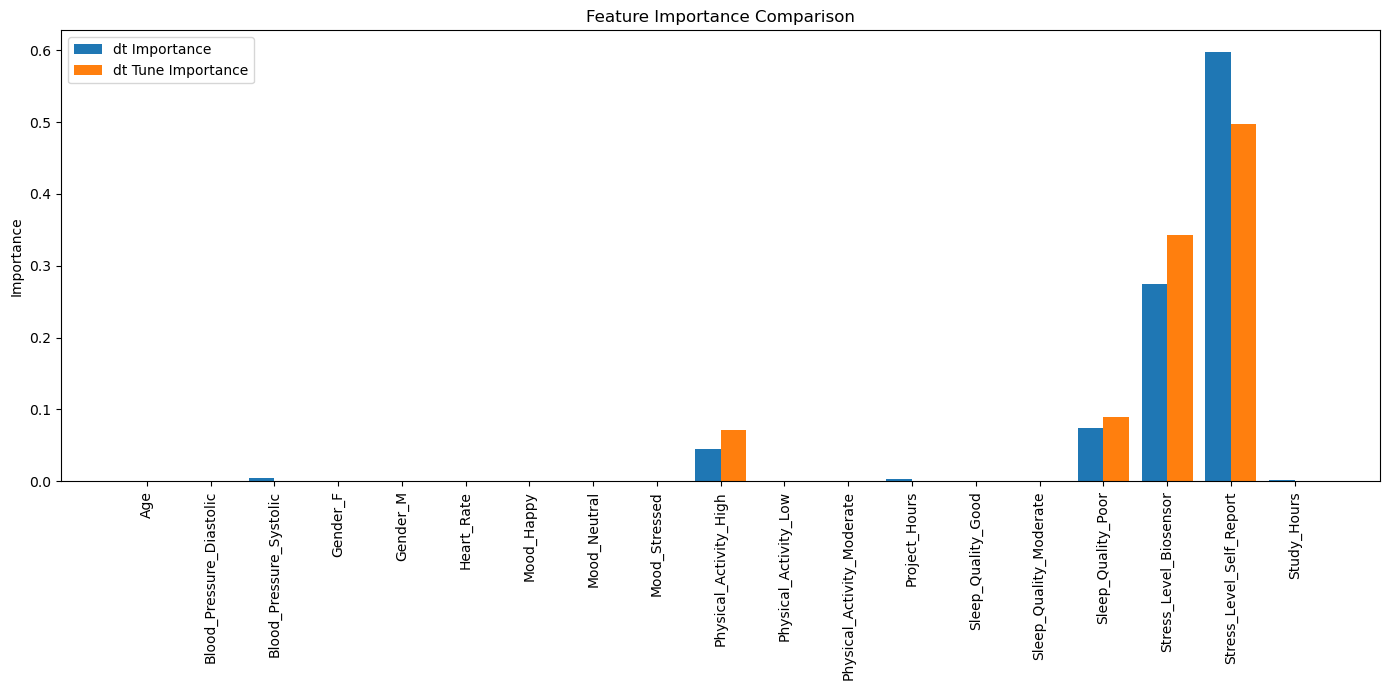

In [194]:
#ensure feature columns are same in both importance dataframes 
importance_dt = importance_dt.sort_values(by='Feature').reset_index(drop=True)
importance_dt_tune = importance_dt_tune.sort_values(by='Feature').reset_index(drop=True)

#merge dataframes on feature column
df_compare = pd.merge(importance_dt, importance_dt_tune, on='Feature', suffixes=('_dt', '_dt_tune'))

#plot comparison
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.4  # Width of the bars

#plot importance for default model
ax.bar(df_compare.index - width / 2, df_compare['Importance_dt'], width, label='dt Importance')

#plot importance for tuned model
ax.bar(df_compare.index + width / 2, df_compare['Importance_dt_tune'], width, label='dt Tune Importance')

#set labels
ax.set_xticks(df_compare.index)
ax.set_xticklabels(df_compare['Feature'], rotation=90)
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.legend()

#show plot
plt.tight_layout()
plt.show()

#### Tuned DT Final Test

The very last step is to see how this model performs with unseen data.

In [195]:
#make predictions on test set
y_pred = dt_tune.predict(X_test2)

#evaluate model
v_acc = accuracy_score(y_test2, y_pred)
v_f1 = f1_score(y_test2, y_pred, average='weighted')
v_precision = precision_score(y_test2, y_pred, average='weighted')
v_recall = recall_score(y_test2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_test2, y_pred, rownames=['Actual'], colnames=['Predicted'])

print(f'Decision Tree (Tuned) Test Accuracy: {v_acc:.2f}')
print(f'Decision Tree (Tuned) Weighted F1-Score: {v_f1:.2f}')
print(f'Decision Tree (Tuned) Weighted Precision: {v_precision:.2f}')
print(f'Decision Tree (Tuned) Weighted Recall: {v_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

Decision Tree (Tuned) Test Accuracy: 1.00
Decision Tree (Tuned) Weighted F1-Score: 1.00
Decision Tree (Tuned) Weighted Precision: 1.00
Decision Tree (Tuned) Weighted Recall: 1.00
Confusion Matrix:
Predicted   0   1   2
Actual               
0          18   0   0
1           0  66   0
2           0   0  14


The model perform exceptionally well on it's final test. 

## Random Forest

### Default Random Forest

Now that we've checked out a decision tree, let's see what random forest can produce. As with the decision tree, we begin with the default random forest.

In [196]:
#initialize random forest
rf = RandomForestClassifier(random_state=13)

#train the model
rf.fit(X_train2, y_train2)

#make predictions on validation set
y_val_pred_rf = rf.predict(X_val2)

#evaluate random forest
rf_acc = accuracy_score(y_val2, y_val_pred_rf)
rf_f1 = f1_score(y_val2, y_val_pred_rf, average='weighted')
rf_precision = precision_score(y_val2, y_val_pred_rf, average='weighted')
rf_recall = recall_score(y_val2, y_val_pred_rf, average='weighted')
confusion_crosstab = pd.crosstab(y_val2, y_val_pred_rf, rownames = ['Actual'], colnames = ['Predicted'])

#print metrics
print(f'Random Forest Validation Accuracy: {rf_acc:.2f}')
print(f'Random Forest Weighted F1-Score: {rf_f1:.2f}')
print(f'Random Forest Weighted Precision: {rf_precision:.2f}')
print(f'Random Forest Weighted Recall: {rf_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)


Random Forest Validation Accuracy: 0.98
Random Forest Weighted F1-Score: 0.98
Random Forest Weighted Precision: 0.98
Random Forest Weighted Recall: 0.98
Confusion Matrix:
Predicted   0   1   2
Actual               
0          19   0   0
1           0  65   0
2           0   2  12


The default random forest is better than our tuned decision tree (in terms of the validatin set).
- Only two instances were miclassified: 2 High instances were classified as Moderate.
- Overall, the performance metrics and confusin matrix indicates that the random forest model is performing very well, with minimal misclassifications.

In [216]:
#perform cross-validation
cv_scores = cross_val_score(rf, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')

Cross-Validation Accuracy: 0.97 (+/- 0.04)


#### Default RF Feature Importance

In [197]:
#get feature importanc scores
feature_importance = rf.feature_importances_

#create dataframe to visualize feature importance scores
importance_rf = pd.DataFrame({'Feature': X_train_encode.columns, 'Importance': feature_importance})

#sort by importance in descending order
importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

#display top features
print(importance_rf)

                       Feature  Importance
5     Stress_Level_Self_Report    0.322402
4       Stress_Level_Biosensor    0.304073
3     Blood_Pressure_Diastolic    0.047011
7                Project_Hours    0.044112
1                   Heart_Rate    0.043449
2      Blood_Pressure_Systolic    0.043027
6                  Study_Hours    0.043024
10      Physical_Activity_High    0.032902
15          Sleep_Quality_Poor    0.029979
0                          Age    0.024332
12  Physical_Activity_Moderate    0.010230
16                  Mood_Happy    0.009064
11       Physical_Activity_Low    0.008071
14      Sleep_Quality_Moderate    0.007520
13          Sleep_Quality_Good    0.007221
17                Mood_Neutral    0.006994
18               Mood_Stressed    0.005967
8                     Gender_F    0.005873
9                     Gender_M    0.004749


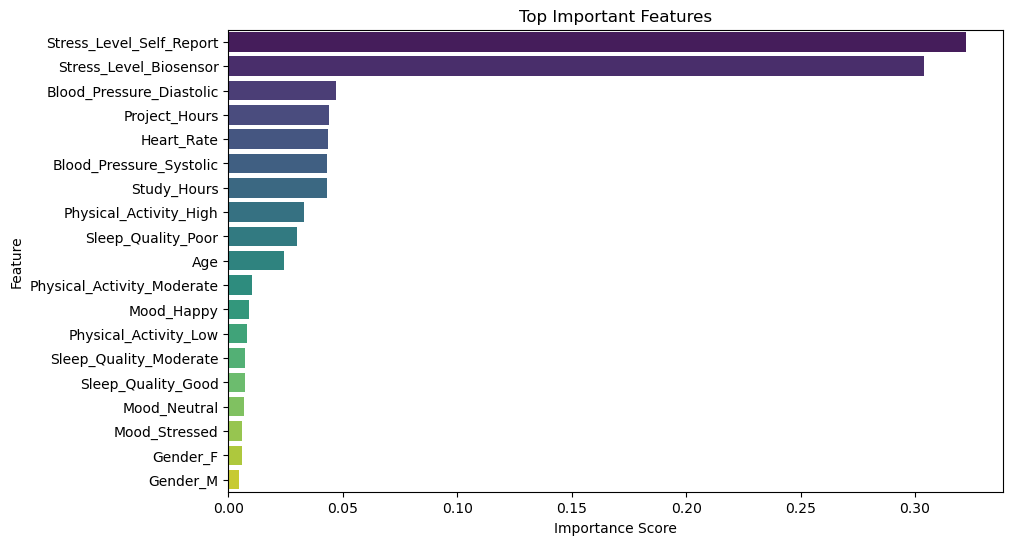

In [198]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf[:20], hue='Feature', palette="viridis", legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

Feature Importance shares in similarities and distinct differences than from the decision tree.
- Stree levels (32% and 30%) are still the most important features. Combined they account for over 62% of the total feature importance.
- blood pressure, project hours, heart rate, and study hours have similar impact, accounting for approximately 4% feature importance each.
- High physical activity, poor sleep quality, and age also have noticeable feature importance.
- The remaining features have very low impact.

Interpretation:
- Stress levels are the most significant predictors of health risk levels. This makes sense as high stress is a known risk factor for various health issues. Interventions and techniques targeting stress reduction could significantly improve student health.
- Blood pressure and heart rate have similar contributions. These physiological metrics are likely correlated with stress and health risks. This model is capturing the physiological effects of stress, where increased stress levels may correlate with changes in heart rate and blood pressure.
- Study and project hours also play an important part. Higher study/project hours may contribute to higher stress levels, which aligns with stress being the top predictor. Additionally, students woith poor health may have lower study hours due to their condition.
- High physical activity is most important among activity levels, indicating that high physical activity is associated with lower or higher health risks.
- Poor sleep quality has a noticeable impact, which suggesrs that poor sleep is linked to higher health risks.
- Age also has a noticeable impact, if only a little.
- Pooling together, we can see that academic load, high phyisical activities, and poor sleep quality may play an important role in stress levels.
- While other features do also play some role in predicting health risk levels, they contribute 1% or less, making them negligble.

### Tuning the Random Forest Classifier

Utilizing GridSearchCV, let's see if we can tune some of the hyperparameters and enhance our model.

In [199]:
#define parameter grid
params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

#initialize random forest
rf = RandomForestClassifier(random_state = 56)

#initialize grid search
grid_search = GridSearchCV(estimator = rf, param_grid = params, cv=10, n_jobs=-1, verbose=2, scoring = 'f1_weighted')

In [200]:
#fit the grid search
grid_search.fit(X_train2, y_train2)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=56),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='f1_weighted', verbose=2)

In [201]:
#get best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


#### Training and Evaluating Tuned RF

In [202]:
#get best model from grid search
rf_tune = grid_search.best_estimator_

#train the tuned model
rf_tune.fit(X_train2, y_train2)

#make predictions
y_pred = rf_tune.predict(X_val2)

#evaluate model 
v_acc = accuracy_score(y_val2, y_pred)
v_f1 = f1_score(y_val2, y_pred, average='weighted')
v_precision = precision_score(y_val2, y_pred, average='weighted')
v_recall = recall_score(y_val2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_val2, y_pred, rownames=['Actual'], colnames=['Predicted'])

#print metrics
print(f'Random Forest (Tuned) Validation Accuracy: {v_acc:.2f}')
print(f'Random Forest (Tuned) Weighted F1-Score: {v_f1:.2f}')
print(f'Random Forest (Tuned) Weighted Precision: {v_precision:.2f}')
print(f'Random Forest (Tuned) Weighted Recall: {v_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

Random Forest (Tuned) Validation Accuracy: 0.99
Random Forest (Tuned) Weighted F1-Score: 0.99
Random Forest (Tuned) Weighted Precision: 0.99
Random Forest (Tuned) Weighted Recall: 0.99
Confusion Matrix:
Predicted   0   1   2
Actual               
0          19   0   0
1           0  65   0
2           0   1  13


Our tuned model performed slightly better than the default model.
- Accuracy, Precision, Recall, and F1 all have scores of 99%.
- Only one miclassification: one High instance was misclassified as Moderate.

In [215]:
#perform cross-validation
cv_scores = cross_val_score(rf_tune, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')

Cross-Validation Accuracy: 0.98 (+/- 0.02)


#### Tuned RF Feature Importance

In [203]:
#get feature importanc scores
feature_importance = rf_tune.feature_importances_

#create dataframe to visualize feature importance scores
importance_rf_tune = pd.DataFrame({'Feature': X_train_encode.columns, 'Importance': feature_importance})

#sort by importance in descending order
importance_rf_tune = importance_rf_tune.sort_values(by='Importance', ascending=False)

#display top features
print(importance_rf_tune)

                       Feature  Importance
5     Stress_Level_Self_Report    0.338799
4       Stress_Level_Biosensor    0.337066
10      Physical_Activity_High    0.040104
15          Sleep_Quality_Poor    0.038522
6                  Study_Hours    0.035950
1                   Heart_Rate    0.034515
2      Blood_Pressure_Systolic    0.033111
7                Project_Hours    0.032728
3     Blood_Pressure_Diastolic    0.031328
0                          Age    0.018437
12  Physical_Activity_Moderate    0.010616
13          Sleep_Quality_Good    0.010542
11       Physical_Activity_Low    0.009212
14      Sleep_Quality_Moderate    0.008623
17                Mood_Neutral    0.004667
16                  Mood_Happy    0.004491
8                     Gender_F    0.004088
9                     Gender_M    0.003752
18               Mood_Stressed    0.003449


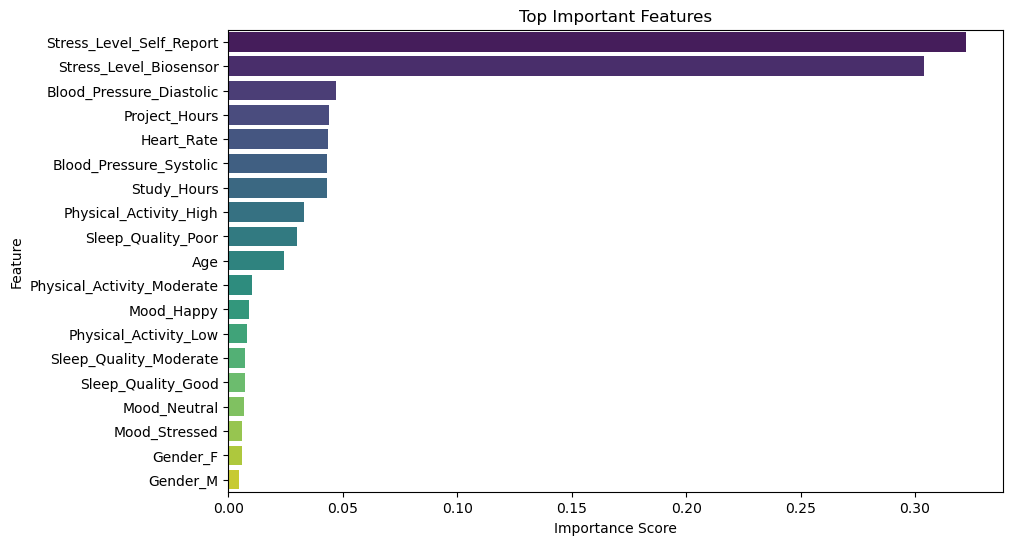

In [204]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf[:20], hue='Feature', palette="viridis", legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

Only a slight change in feature importance compared to the default random forest.
- Stress is still higlighted as the most important feature.
- Blood pressure is a bit further down while higih physical activity and poor sleep quality is higher up.

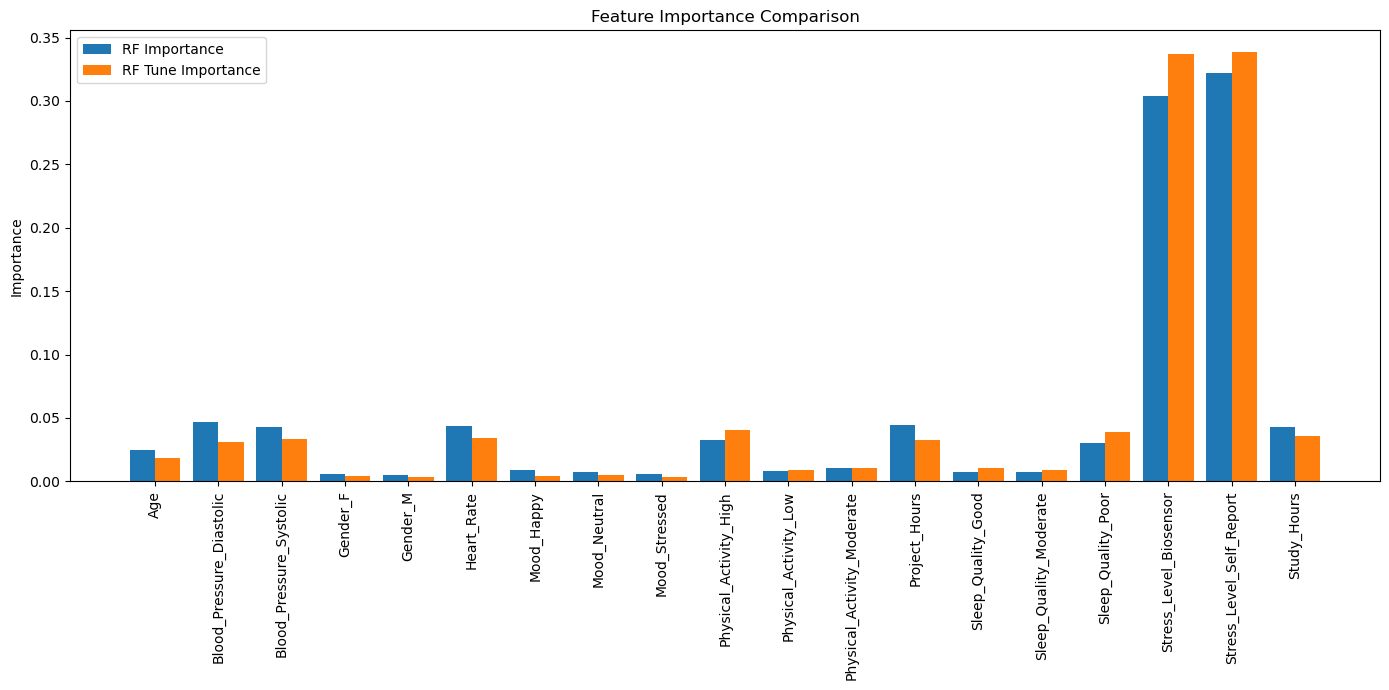

In [205]:
#ensure feature columns are same in both importance dataframes 
importance_rf = importance_rf.sort_values(by='Feature').reset_index(drop=True)
importance_rf_tune = importance_rf_tune.sort_values(by='Feature').reset_index(drop=True)

#merge dataframes on feature column
df_compare = pd.merge(importance_rf, importance_rf_tune, on='Feature', suffixes=('_rf', '_rf_tune'))

#plot comparison
fig, ax = plt.subplots(figsize=(14, 7))
width = 0.4  # Width of the bars

#plot importance for default model
ax.bar(df_compare.index - width / 2, df_compare['Importance_rf'], width, label='RF Importance')

#plot importance for tuned model
ax.bar(df_compare.index + width / 2, df_compare['Importance_rf_tune'], width, label='RF Tune Importance')

#set labels
ax.set_xticks(df_compare.index)
ax.set_xticklabels(df_compare['Feature'], rotation=90)
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.legend()

#show plot
plt.tight_layout()
plt.show()

#### Tuned RF Final Test

Last part os the check how this model does with unseen data.

In [206]:
#make predictions on test set
y_pred = rf_tune.predict(X_test2)

#evaluate model
v_acc = accuracy_score(y_test2, y_pred)
v_f1 = f1_score(y_test2, y_pred, average='weighted')
v_precision = precision_score(y_test2, y_pred, average='weighted')
v_recall = recall_score(y_test2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_test2, y_pred, rownames=['Actual'], colnames=['Predicted'])

#print metrics
print(f'Random Forest (Tuned) Test Accuracy: {v_acc:.2f}')
print(f'Random Forest (Tuned) Weighted F1-Score: {v_f1:.2f}')
print(f'Random Forest (Tuned) Weighted Precision: {v_precision:.2f}')
print(f'Random Forest (Tuned) Weighted Recall: {v_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

Random Forest (Tuned) Test Accuracy: 1.00
Random Forest (Tuned) Weighted F1-Score: 1.00
Random Forest (Tuned) Weighted Precision: 1.00
Random Forest (Tuned) Weighted Recall: 1.00
Confusion Matrix:
Predicted   0   1   2
Actual               
0          18   0   0
1           0  66   0
2           0   0  14


As with the tuned decision tree, this model did great on unseen data.

## XGBoost

#### Initial XGB Model

In [210]:
#initialize xgboost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=13)

#train the model
xgb.fit(X_train2, y_train2)

#make predictions on validation set
y_pred = xgb.predict(X_val2)

#evaluate XGBoost
xgb_acc = accuracy_score(y_val2, y_pred)
xgb_f1 = f1_score(y_val2, y_pred, average='weighted')
xgb_precision = precision_score(y_val2, y_pred, average='weighted')
xgb_recall = recall_score(y_val2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_val2, y_pred, rownames = ['Actual'], colnames = ['Predicted'])

print(f'XGBoost Validation Accuracy: {xgb_acc:.2f}')
print(f'XGBoost Weighted F1-Score: {xgb_f1:.2f}')
print(f'XGBoost Weighted Precision: {xgb_precision:.2f}')
print(f'XGBoost Weighted Recall: {xgb_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

XGBoost Validation Accuracy: 1.00
XGBoost Weighted F1-Score: 1.00
XGBoost Weighted Precision: 1.00
XGBoost Weighted Recall: 1.00
Confusion Matrix:
Predicted   0   1   2
Actual               
0          19   0   0
1           0  65   0
2           0   0  14


Right away, this model proves to be very successful in predicting health risk levels. Let's investigate which features thos model deems as important.

In [214]:
#perform cross-validation
cv_scores = cross_val_score(xgb, X_train2, y_train2, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})')

Cross-Validation Accuracy: 1.00 (+/- 0.01)


#### XGBost Feature Importance

In [208]:
#get feature importanc scores
feature_importance = xgb.feature_importances_

#create dataframe to visualize feature importance scores
importance_xgb = pd.DataFrame({'Feature': X_train_encode.columns, 'Importance': feature_importance})

#sort by importance in descending order
importance_xgb = importance_xgb.sort_values(by='Importance', ascending=False)

#display top features
print(importance_xgb)

                       Feature  Importance
5     Stress_Level_Self_Report    0.401123
4       Stress_Level_Biosensor    0.319384
15          Sleep_Quality_Poor    0.141437
10      Physical_Activity_High    0.099521
6                  Study_Hours    0.012987
2      Blood_Pressure_Systolic    0.008283
12  Physical_Activity_Moderate    0.004191
1                   Heart_Rate    0.003148
13          Sleep_Quality_Good    0.002623
0                          Age    0.002099
7                Project_Hours    0.001914
14      Sleep_Quality_Moderate    0.001044
3     Blood_Pressure_Diastolic    0.000882
17                Mood_Neutral    0.000691
16                  Mood_Happy    0.000673
9                     Gender_M    0.000000
11       Physical_Activity_Low    0.000000
8                     Gender_F    0.000000
18               Mood_Stressed    0.000000


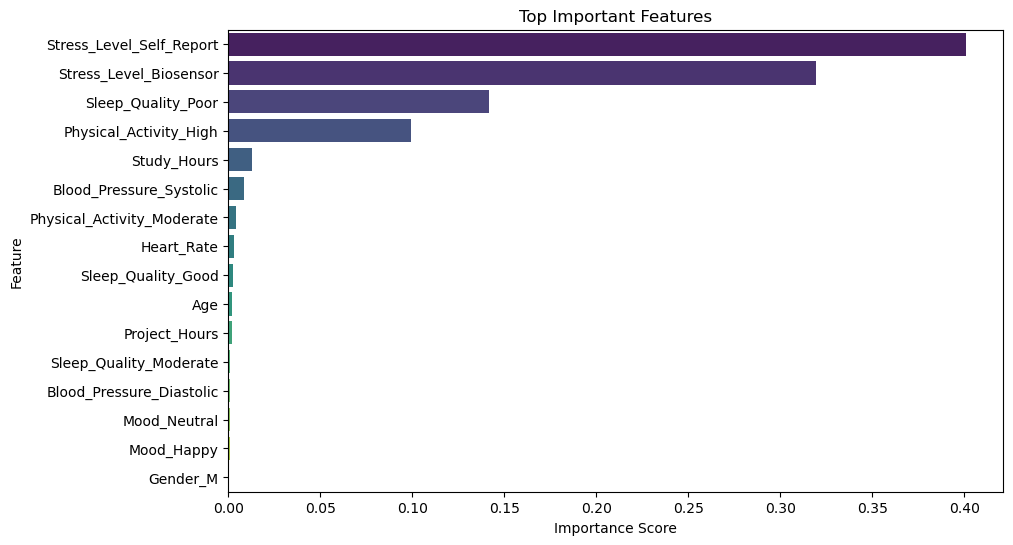

In [209]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_xgb['Importance'][:16], y=importance_xgb['Feature'][:16], hue=importance_xgb['Feature'][:16], 
            palette="viridis", legend=False)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top Important Features')
plt.show()

XGBoost shows that the most important features are the same as with our tuned decision tree. That is, Stress, high physical activity, and poor sleep quality are the biggest indicators of health risk levels.

#### XGBoost Final Test

In [211]:
#make predictions on validation set
y_pred = xgb.predict(X_test2)

#evaluate XGBoost
xgb_acc = accuracy_score(y_test2, y_pred)
xgb_f1 = f1_score(y_test2, y_pred, average='weighted')
xgb_precision = precision_score(y_test2, y_pred, average='weighted')
xgb_recall = recall_score(y_test2, y_pred, average='weighted')
confusion_crosstab = pd.crosstab(y_test2, y_pred, rownames = ['Actual'], colnames = ['Predicted'])

print(f'XGBoost Validation Accuracy: {xgb_acc:.2f}')
print(f'XGBoost Weighted F1-Score: {xgb_f1:.2f}')
print(f'XGBoost Weighted Precision: {xgb_precision:.2f}')
print(f'XGBoost Weighted Recall: {xgb_recall:.2f}')
print('Confusion Matrix:')
print(confusion_crosstab)

XGBoost Validation Accuracy: 1.00
XGBoost Weighted F1-Score: 1.00
XGBoost Weighted Precision: 1.00
XGBoost Weighted Recall: 1.00
Confusion Matrix:
Predicted   0   1   2
Actual               
0          18   0   0
1           0  66   0
2           0   0  14


# Notes

This section is where I will metion items of notes, thoughts, additional questions, and anything else I I wish to investigate futher.

From Outlier Detection
- Go into detail on the basic descriptive stats.
- Check how outliers correlate to the other features. For example, does a high outlier in blood pressure relate to high stress?
- Analyze the outlier instance table further. This ties into what I mention above.
- Mention changes in descriptive stats after outlier removal.
- Talk about distribution of variables in histograms.

For Correlation Analysis
- Talk about implication of no numerical correlations. This includes implications on the data, and on potential models.
- Expand on correlation between numerical and target
- Expand on categorical correlation. This includes analyzing the heatmap and p-value table more thoroghly.
- Consider Mutual Information.

From Tree-Based Models
- Run the models after performing feature selection. Feature importance already done, just need to cut irrelevant features from dataset.
- Each model indicates that stress is the highest predictor of health risk levels. Analyze how other features relate to stress features.
- Interpret Accuracy, PRecision, Recall, and F1-Score.
- Make notes on comparison plot for feature importance.
- Summarize findings, mention additional research potentials, and more (interpretations from DT and RF).
- Make notes on CV scores.
- Discuss reasons for such well-performing models (data complexity and size, for example).